# **CIS 731 ANN Final Project Implementation** <br>

# **Traffic Volume Prediction** <br>

# **By** <br>
# **Prankur Garg (pgarg03)** <br>
# **Hitesh Thadhani (hthadhan)**


## This Notebook contains Data Cleaning, Exploratory Data Analysis, Feed Forward Neural Networks and Univariate Time Series Forecasting

## The Other Notebook contains Multivariate Time Series Forecasting 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from tensorflow.python.keras.models import Sequential,Model
from tensorflow.python.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.python.keras.layers import Dense,Embedding,Flatten,Input,Concatenate, Reshape, Dropout,merge,Activation,LSTM,GRU,SimpleRNN,Conv1D, MaxPooling1D, Flatten
from tensorflow.python.keras.layers import merge
import pandas as pd
import numpy as np
#! pip install categorical_embedder
import categorical_embedder as ce

In [3]:
df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [4]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,Day_Week,Weekend
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,10/2/2012 9:00,5545,2,0
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,10/2/2012 10:00,4516,2,0
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,10/2/2012 11:00,4767,2,0
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,10/2/2012 12:00,5026,2,0
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,10/2/2012 13:00,4918,2,0


In [5]:
df.nunique()

holiday                   12
temp                    5843
rain_1h                  372
snow_1h                   12
clouds_all                60
weather_main              11
weather_description       38
date_time              40575
traffic_volume          6704
Day_Week                   7
Weekend                    2
dtype: int64

In [6]:
df['holiday'].unique()

array(['None', 'Columbus Day', 'Veterans Day', 'Thanksgiving Day',
       'Christmas Day', 'New Years Day', 'Washingtons Birthday',
       'Memorial Day', 'Independence Day', 'State Fair', 'Labor Day',
       'Martin Luther King Jr Day'], dtype=object)

In [7]:
df['weather_main'].unique()

array(['Clouds', 'Clear', 'Rain', 'Drizzle', 'Mist', 'Haze', 'Fog',
       'Thunderstorm', 'Snow', 'Squall', 'Smoke'], dtype=object)

In [8]:
df['weather_description'].unique()

array(['scattered clouds', 'broken clouds', 'overcast clouds',
       'sky is clear', 'few clouds', 'light rain',
       'light intensity drizzle', 'mist', 'haze', 'fog',
       'proximity shower rain', 'drizzle', 'moderate rain',
       'heavy intensity rain', 'proximity thunderstorm',
       'thunderstorm with light rain', 'proximity thunderstorm with rain',
       'heavy snow', 'heavy intensity drizzle', 'snow',
       'thunderstorm with heavy rain', 'freezing rain', 'shower snow',
       'light rain and snow', 'light intensity shower rain', 'SQUALLS',
       'thunderstorm with rain', 'proximity thunderstorm with drizzle',
       'thunderstorm', 'Sky is Clear', 'very heavy rain',
       'thunderstorm with light drizzle', 'light snow',
       'thunderstorm with drizzle', 'smoke', 'shower drizzle',
       'light shower snow', 'sleet'], dtype=object)

## Data Cleaning

In [9]:
df_t = df.copy()

In [10]:
df_t.shape

(48204, 11)

In [11]:
# Remove Duplicates
df_t.drop_duplicates(keep='first')

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,Day_Week,Weekend
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,10/2/2012 9:00,5545,2,0
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,10/2/2012 10:00,4516,2,0
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,10/2/2012 11:00,4767,2,0
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,10/2/2012 12:00,5026,2,0
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,10/2/2012 13:00,4918,2,0
...,...,...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,9/30/2018 19:00,3543,7,1
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,9/30/2018 20:00,2781,7,1
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,9/30/2018 21:00,2159,7,1
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,9/30/2018 22:00,1450,7,1


In [12]:
# Convert to date_time format 

df_t['date_time_new'] = pd.to_datetime(df_t['date_time'])

In [13]:
df_t.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,Day_Week,Weekend,date_time_new
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,10/2/2012 9:00,5545,2,0,2012-10-02 09:00:00
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,10/2/2012 10:00,4516,2,0,2012-10-02 10:00:00
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,10/2/2012 11:00,4767,2,0,2012-10-02 11:00:00
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,10/2/2012 12:00,5026,2,0,2012-10-02 12:00:00
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,10/2/2012 13:00,4918,2,0,2012-10-02 13:00:00


In [14]:
# Create a new feature Weekday based on the date

df_t['date_time_new'].apply(lambda x: x.weekday())

0        1
1        1
2        1
3        1
4        1
        ..
48199    6
48200    6
48201    6
48202    6
48203    6
Name: date_time_new, Length: 48204, dtype: int64

In [15]:

# Fill the Mising hours values using the resample method 
abc = df_t.set_index('date_time_new').resample('H').first()

In [16]:
abc['date_time_new'] = abc.index

In [17]:
abc['date_time'] = pd.to_datetime(abc['date_time'])

In [18]:
abc.shape

(52551, 12)

In [19]:
abc.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,Day_Week,Weekend,date_time_new
date_time_new,,,,,,,,,,,,
2012-10-02 09:00:00,None,288.28,0.0,0.0,40.0,Clouds,scattered clouds,2012-10-02 09:00:00,5545.0,2.0,0.0,2012-10-02 09:00:00
2012-10-02 10:00:00,None,289.36,0.0,0.0,75.0,Clouds,broken clouds,2012-10-02 10:00:00,4516.0,2.0,0.0,2012-10-02 10:00:00
2012-10-02 11:00:00,None,289.58,0.0,0.0,90.0,Clouds,overcast clouds,2012-10-02 11:00:00,4767.0,2.0,0.0,2012-10-02 11:00:00
2012-10-02 12:00:00,None,290.13,0.0,0.0,90.0,Clouds,overcast clouds,2012-10-02 12:00:00,5026.0,2.0,0.0,2012-10-02 12:00:00
2012-10-02 13:00:00,None,291.14,0.0,0.0,75.0,Clouds,broken clouds,2012-10-02 13:00:00,4918.0,2.0,0.0,2012-10-02 13:00:00


In [20]:
abc.isnull().sum()

holiday                11976
temp                   11976
rain_1h                11976
snow_1h                11976
clouds_all             11976
weather_main           11976
weather_description    11976
date_time              11976
traffic_volume         11976
Day_Week               11976
Weekend                11976
date_time_new              0
dtype: int64

In [21]:
abc.date_time.fillna(value=(abc.date_time_new),inplace=True)

In [22]:
type(abc.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [23]:
abc.drop(['date_time_new'],inplace=True,axis=1)

In [24]:
abc.isnull().sum()

holiday                11976
temp                   11976
rain_1h                11976
snow_1h                11976
clouds_all             11976
weather_main           11976
weather_description    11976
date_time                  0
traffic_volume         11976
Day_Week               11976
Weekend                11976
dtype: int64

In [25]:
abc1 = abc.copy()

In [26]:
abc1['Day_Week'] = abc1['date_time'].apply(lambda x: x.weekday())

In [27]:
abc1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52551 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Freq: H
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              40575 non-null  object        
 1   temp                 40575 non-null  float64       
 2   rain_1h              40575 non-null  float64       
 3   snow_1h              40575 non-null  float64       
 4   clouds_all           40575 non-null  float64       
 5   weather_main         40575 non-null  object        
 6   weather_description  40575 non-null  object        
 7   date_time            52551 non-null  datetime64[ns]
 8   traffic_volume       40575 non-null  float64       
 9   Day_Week             52551 non-null  int64         
 10  Weekend              40575 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(3)
memory usage: 4.8+ MB


In [28]:
Week_day_list = [1, 2, 3, 4, 5]

In [29]:
# Create new feature Weekend which will be 1 if Day_Week is 1 to 5

abc1['Weekend'] = abc1['Day_Week'].apply(lambda x: 0 if  x in Week_day_list else 1)

In [30]:
abc1[['Day_Week','Weekend']]

,Day_Week,Weekend
date_time_new,,
2012-10-02 09:00:00,1,0
2012-10-02 10:00:00,1,0
2012-10-02 11:00:00,1,0
2012-10-02 12:00:00,1,0
2012-10-02 13:00:00,1,0
...,...,...
2018-09-30 19:00:00,6,1
2018-09-30 20:00:00,6,1
2018-09-30 21:00:00,6,1


In [31]:
# Convert Temperature from Kelvin to Celsius scale

def kelvin_to_celsius(temp_kelvin):
    
    temp_celsius = (temp_kelvin - 273.15) 
    return temp_celsius

In [32]:
abc1.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,Day_Week,Weekend
count,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,52551.000000,52551.000000
mean,281.316763,0.318632,0.000117,44.199162,3290.650474,3.001713,0.285437
std,13.816618,48.812640,0.005676,38.683447,1984.772909,1.999447,0.451627
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,271.840000,0.000000,0.000000,1.000000,1248.500000,1.000000,0.000000
50%,282.860000,0.000000,0.000000,40.000000,3427.000000,3.000000,0.000000
75%,292.280000,0.000000,0.000000,90.000000,4952.000000,5.000000,1.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000,6.000000,1.000000


<AxesSubplot:xlabel='date_time_new', ylabel='traffic_volume'>

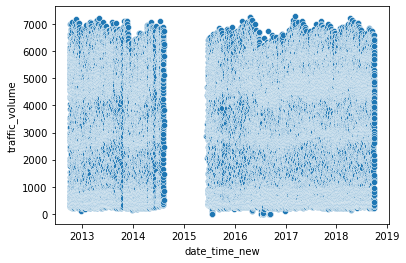

In [33]:
# Scatter plot of Traffic volume variable showing missing data from Mid 2014 to Mid 2015

sns.scatterplot(data=abc1['traffic_volume'])

<AxesSubplot:>

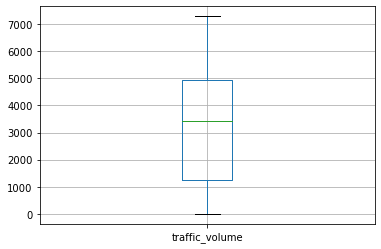

In [34]:
abc1[['traffic_volume']].boxplot()

In [35]:
# Checking Traffic volume if it is below 1 meaning no vehicles passed during that time

abc1[abc1['traffic_volume'] <1]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,Day_Week,Weekend
date_time_new,,,,,,,,,,,
2016-07-23 18:00:00,None,296.68,0.0,0.0,40.0,Rain,light rain,2016-07-23 18:00:00,0.0,5,0
2016-07-23 23:00:00,None,295.90,0.0,0.0,90.0,Haze,haze,2016-07-23 23:00:00,0.0,5,0


<AxesSubplot:>

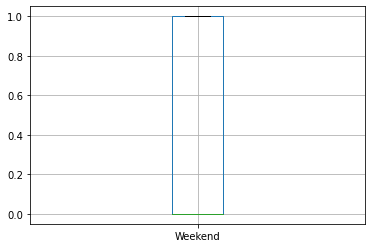

In [36]:
abc1[['Weekend']].boxplot()

In [37]:
abc1['temp'] = abc1['temp'].apply(kelvin_to_celsius)

In [38]:
abc2 = abc1.copy()

In [39]:
abc2.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,Day_Week,Weekend
count,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,52551.000000,52551.000000
mean,8.166763,0.318632,0.000117,44.199162,3290.650474,3.001713,0.285437
std,13.816618,48.812640,0.005676,38.683447,1984.772909,1.999447,0.451627
min,-273.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.310000,0.000000,0.000000,1.000000,1248.500000,1.000000,0.000000
50%,9.710000,0.000000,0.000000,40.000000,3427.000000,3.000000,0.000000
75%,19.130000,0.000000,0.000000,90.000000,4952.000000,5.000000,1.000000
max,36.920000,9831.300000,0.510000,100.000000,7280.000000,6.000000,1.000000


In [40]:
# Temperature below -29 Celsius is checked

abc2[abc2['temp'] < -29]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,Day_Week,Weekend
date_time_new,,,,,,,,,,,
2014-01-31 03:00:00,None,-273.15,0.0,0.0,0.0,Clear,sky is clear,2014-01-31 03:00:00,361.0,4,0
2014-01-31 04:00:00,None,-273.15,0.0,0.0,0.0,Clear,sky is clear,2014-01-31 04:00:00,734.0,4,0
2014-01-31 05:00:00,None,-273.15,0.0,0.0,0.0,Clear,sky is clear,2014-01-31 05:00:00,2557.0,4,0
2014-01-31 06:00:00,None,-273.15,0.0,0.0,0.0,Clear,sky is clear,2014-01-31 06:00:00,5150.0,4,0
2014-02-02 03:00:00,None,-273.15,0.0,0.0,0.0,Clear,sky is clear,2014-02-02 03:00:00,291.0,6,1
2014-02-02 04:00:00,None,-273.15,0.0,0.0,0.0,Clear,sky is clear,2014-02-02 04:00:00,284.0,6,1
2014-02-02 05:00:00,None,-273.15,0.0,0.0,0.0,Clear,sky is clear,2014-02-02 05:00:00,434.0,6,1
2014-02-02 06:00:00,None,-273.15,0.0,0.0,0.0,Clear,sky is clear,2014-02-02 06:00:00,739.0,6,1
2014-02-02 07:00:00,None,-273.15,0.0,0.0,0.0,Clear,sky is clear,2014-02-02 07:00:00,962.0,6,1


In [41]:
dates = ['2014-01-31 03:00:00','2014-01-31 04:00:00','2014-01-31 05:00:00','2014-01-31 06:00:00']

In [42]:
abc1['temp'][abc1['date_time'] == '2014-01-31 02:00:00'].values

array([-17.22])

In [43]:
# Changing the temp values with extreme temp using the previous hours reading

for date in dates:
    abc2['temp'][abc2['date_time'] == date] = abc2['temp'][abc2['date_time'] == '2014-01-31 02:00:00'].values

In [44]:
dates_1 = ['2014-02-02 03:00:00','2014-02-02 04:00:00','2014-02-02 05:00:00','2014-02-02 06:00:00','2014-02-02 07:00:00','2014-02-02 08:00:00']

In [45]:
abc1['temp'][abc1['date_time'] == '2014-02-02 02:00:00']

date_time_new
2014-02-02 02:00:00   -17.78
Freq: H, Name: temp, dtype: float64

In [46]:
# Changing the temp values with extreme temp using the previous hours reading

for date in dates_1:
    abc2['temp'][abc2['date_time'] == date] = abc2['temp'][abc2['date_time'] == '2014-02-02 02:00:00'].values

In [47]:
abc2.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,Day_Week,Weekend
count,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,52551.000000,52551.000000
mean,8.229756,0.318632,0.000117,44.199162,3290.650474,3.001713,0.285437
std,13.097831,48.812640,0.005676,38.683447,1984.772909,1.999447,0.451627
min,-29.760000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.310000,0.000000,0.000000,1.000000,1248.500000,1.000000,0.000000
50%,9.710000,0.000000,0.000000,40.000000,3427.000000,3.000000,0.000000
75%,19.130000,0.000000,0.000000,90.000000,4952.000000,5.000000,1.000000
max,36.920000,9831.300000,0.510000,100.000000,7280.000000,6.000000,1.000000


In [48]:
# Rainfall greater than 30mm 

abc2[abc2['rain_1h'] > 30]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,Day_Week,Weekend
date_time_new,,,,,,,,,,,
2013-06-24 11:00:00,None,22.67,44.45,0.0,76.0,Rain,very heavy rain,2013-06-24 11:00:00,4802.0,0,1
2013-08-07 02:00:00,None,15.95,55.63,0.0,68.0,Rain,very heavy rain,2013-08-07 02:00:00,315.0,2,0
2016-07-11 17:00:00,None,28.96,9831.30,0.0,75.0,Rain,very heavy rain,2016-07-11 17:00:00,5535.0,0,1
2016-08-16 17:00:00,None,24.56,31.75,0.0,0.0,Rain,very heavy rain,2016-08-16 17:00:00,4913.0,1,0


In [49]:
# Capping extreme heavy rainfall values to value based on previous reading to avoid outliers

abc2['rain_1h'][abc2['date_time'] == '2016-07-11 17:00:00'] = 31.3

In [50]:
abc2.isnull().sum()

holiday                11976
temp                   11976
rain_1h                11976
snow_1h                11976
clouds_all             11976
weather_main           11976
weather_description    11976
date_time                  0
traffic_volume         11976
Day_Week                   0
Weekend                    0
dtype: int64

In [51]:
# Checking the Null Values Rows

abc2[abc2.isna().any(axis=1)]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,Day_Week,Weekend
date_time_new,,,,,,,,,,,
2012-10-03 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-10-03 07:00:00,NaN,2,0
2012-10-03 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-10-03 10:00:00,NaN,2,0
2012-10-03 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-10-03 11:00:00,NaN,2,0
2012-10-03 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-10-03 17:00:00,NaN,2,0
2012-10-05 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-10-05 02:00:00,NaN,4,0
...,...,...,...,...,...,...,...,...,...,...,...
2018-06-02 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-06-02 02:00:00,NaN,5,0
2018-08-07 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-08-07 07:00:00,NaN,1,0
2018-08-07 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-08-07 08:00:00,NaN,1,0


In [52]:
# Remove the time for which no data is available

filter_dates = (abc2['date_time'].between(('2014-08-08'),('2015-07-01')))

In [53]:
filter_dates.shape

(52551,)

In [54]:
abc3 = abc2[~filter_dates]

In [55]:
abc3.isnull().sum()

holiday                4279
temp                   4279
rain_1h                4279
snow_1h                4279
clouds_all             4279
weather_main           4279
weather_description    4279
date_time                 0
traffic_volume         4279
Day_Week                  0
Weekend                   0
dtype: int64

<AxesSubplot:>

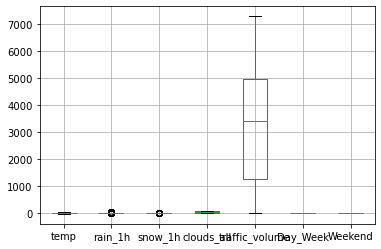

In [56]:
abc3.boxplot()

In [57]:
# Filling the Missing values in the Numeric Columns by using Interpolation with time as the method and backfill 

In [58]:
abc4 = abc3.copy()

In [59]:
abc4[['temp','rain_1h','snow_1h','clouds_all','traffic_volume']] = abc4[['temp','rain_1h','snow_1h','clouds_all','traffic_volume']].interpolate(method='time',axis=0,limit_direction='backward')

In [60]:
# Backfill the categorical values for Weather Description as we cannot impute it like numeric values

abc4['weather_description'] = abc4['weather_description'].fillna(method='bfill')

In [61]:
abc4['weather_main'] = abc4['weather_main'].fillna(method='bfill')

In [62]:
abc4.isnull().sum()

holiday                4279
temp                      0
rain_1h                   0
snow_1h                   0
clouds_all                0
weather_main              0
weather_description       0
date_time                 0
traffic_volume            0
Day_Week                  0
Weekend                   0
dtype: int64

In [63]:
# Filling the missing Holidays as per the Federal Calender manually

abc4['holiday'][abc4['date_time'] == '2013-01-21 00:00:00'] = 'Martin Luther King Jr Day'

In [64]:
abc4['holiday'][abc4['date_time'] == '2013-01-21 00:00:00']

date_time_new
2013-01-21    Martin Luther King Jr Day
Name: holiday, dtype: object

In [65]:
abc4['holiday'][abc4['date_time'] == '2016-01-18 00:00:00'] = 'Martin Luther King Jr Day'

In [66]:
abc4[abc4.holiday.isnull()]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,Day_Week,Weekend
date_time_new,,,,,,,,,,,
2012-10-03 07:00:00,NaN,5.025000,0.0,0.0,1.00,Clear,sky is clear,2012-10-03 07:00:00,6092.000000,2,0
2012-10-03 10:00:00,NaN,12.493333,0.0,0.0,1.00,Clear,sky is clear,2012-10-03 10:00:00,5346.333333,2,0
2012-10-03 11:00:00,NaN,15.656667,0.0,0.0,1.00,Clear,sky is clear,2012-10-03 11:00:00,5221.666667,2,0
2012-10-03 17:00:00,NaN,21.245000,0.0,0.0,10.50,Clouds,few clouds,2012-10-03 17:00:00,5380.000000,2,0
2012-10-05 02:00:00,NaN,16.710000,0.0,0.0,20.00,Clear,sky is clear,2012-10-05 02:00:00,378.000000,4,0
...,...,...,...,...,...,...,...,...,...,...,...
2018-06-02 02:00:00,NaN,16.505000,0.0,0.0,1.00,Clear,sky is clear,2018-06-02 02:00:00,638.000000,5,0
2018-08-07 07:00:00,NaN,19.257750,0.0,0.0,11.75,Clouds,scattered clouds,2018-08-07 07:00:00,5464.500000,1,0
2018-08-07 08:00:00,NaN,21.115500,0.0,0.0,22.50,Clouds,scattered clouds,2018-08-07 08:00:00,5115.000000,1,0


In [67]:
# Filling the Holidays for the whole 24 hours duration as compared to only once at midnight in the original data

ind = abc4[(abc4['holiday'] != "None") & (abc4['holiday'].isna() == False)].index

for val in ind:
    abc4.loc[abc4['date_time'].dt.date == val.date(),'holiday'] = abc4.loc[val]['holiday']

In [68]:
abc4['holiday'][abc4['date_time'] == '2013-01-22 00:00:00']

date_time_new
2013-01-22    NaN
Name: holiday, dtype: object

In [69]:
abc4.isnull().sum()

holiday                4196
temp                      0
rain_1h                   0
snow_1h                   0
clouds_all                0
weather_main              0
weather_description       0
date_time                 0
traffic_volume            0
Day_Week                  0
Weekend                   0
dtype: int64

In [70]:
abc4['holiday'] = abc4['holiday'].fillna('None')

In [71]:
abc4.isnull().sum()

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
traffic_volume         0
Day_Week               0
Weekend                0
dtype: int64

### The Data is now clean with no null values and outliers

In [72]:
abc4.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,Day_Week,Weekend
count,44702.000000,44702.000000,44702.000000,44702.000000,44702.000000,44702.000000,44702.000000
mean,8.045382,0.078466,0.000163,44.283511,3295.862724,3.001499,0.285088
std,12.951216,0.758759,0.006412,38.446347,1972.026872,1.998427,0.451461
min,-29.760000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.210000,0.000000,0.000000,1.000000,1291.000000,1.000000,0.000000
50%,9.050000,0.000000,0.000000,40.000000,3440.000000,3.000000,0.000000
75%,18.930000,0.000000,0.000000,90.000000,4959.000000,5.000000,1.000000
max,36.920000,55.630000,0.510000,100.000000,7280.000000,6.000000,1.000000


In [73]:
abc4.select_dtypes('object').columns

Index(['holiday', 'weather_main', 'weather_description'], dtype='object')

In [74]:
abc4.holiday.value_counts()

None                         43382
Memorial Day                   120
Christmas Day                  120
New Years Day                  120
Washingtons Birthday           120
Labor Day                      120
State Fair                     120
Veterans Day                   120
Independence Day               120
Thanksgiving Day               120
Columbus Day                   120
Martin Luther King Jr Day      120
Name: holiday, dtype: int64

In [75]:
abc4.weather_main.value_counts()

Clouds          16352
Clear           14742
Rain             5242
Mist             3442
Snow             2793
Haze              856
Drizzle           567
Thunderstorm      467
Fog               225
Smoke              15
Squall              1
Name: weather_main, dtype: int64

In [ ]:
abc4.to_csv('final_clean_traffic.csv')

## EDA

**From the plot of graph for the Holidays like Columbus Day, Independence day it is evident that for different holidays the traffic volume pattern and values differ a lot. We cannot say directly that for each holiday the traffic volume is almost the same**

<AxesSubplot:xlabel='date_time_new', ylabel='traffic_volume'>

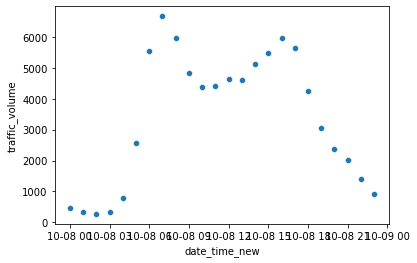

In [76]:
sns.scatterplot(data = abc4.traffic_volume[abc4['holiday'] == 'Columbus Day'][0:24])

<AxesSubplot:xlabel='date_time_new', ylabel='traffic_volume'>

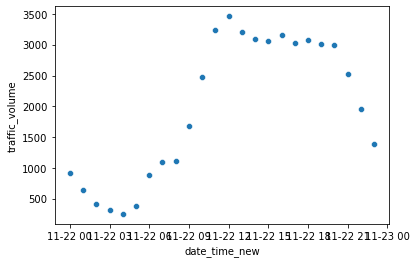

In [77]:
sns.scatterplot(data=abc4.traffic_volume[abc4['holiday'] == 'Thanksgiving Day'][0:24])


<AxesSubplot:xlabel='date_time_new', ylabel='traffic_volume'>

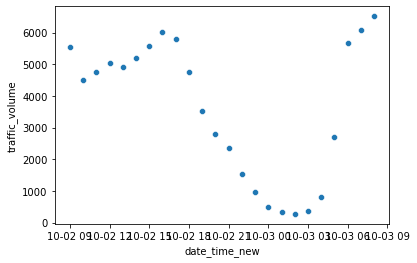

In [78]:
sns.scatterplot(data = abc4.traffic_volume[abc4['holiday'] == 'None'][0:24])

**The traffic volume on Weekdays and Weekends is completely different. For Weekdays, the traffic is heavy during the early morning hours as most of the people travel to office and come back in the evening where the traffic volume is again high.** <br>

**On Weekends, the traffic volume pattern is different. People go out for parties, spending time with family or vacation due to which the traffic is heavy during the late morning to afternoon and not in the early morning**

<AxesSubplot:xlabel='date_time_new', ylabel='traffic_volume'>

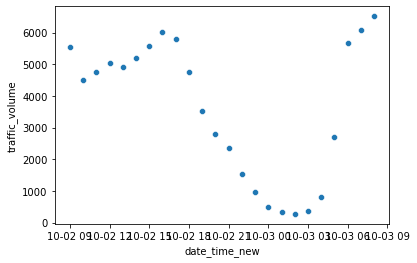

In [79]:
sns.scatterplot(data=abc4.traffic_volume[abc4['Weekend'] == 0][0:24])

<AxesSubplot:xlabel='date_time_new', ylabel='traffic_volume'>

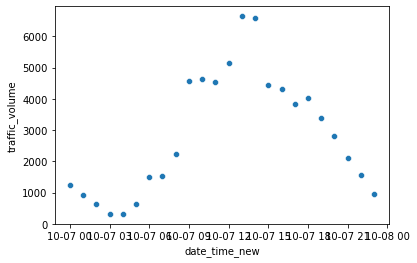

In [80]:
sns.scatterplot(data=abc4.traffic_volume[abc4['Weekend'] == 1][0:24])

In [81]:
# Lower case all the weather conditions to find the same ones

abc4['weather_description'] = abc4['weather_description'].map(lambda x:x.lower())

In [82]:
abc5 = abc4.copy()

In [83]:
abc5['weather_desc'] = abc5['weather_description']

In [84]:
abc5.weather_description.unique()

array(['scattered clouds', 'broken clouds', 'overcast clouds',
       'sky is clear', 'few clouds', 'light rain',
       'light intensity drizzle', 'mist', 'fog', 'proximity shower rain',
       'moderate rain', 'drizzle', 'heavy intensity rain',
       'proximity thunderstorm', 'haze', 'heavy snow',
       'thunderstorm with light rain', 'snow', 'light rain and snow',
       'light intensity shower rain', 'squalls',
       'proximity thunderstorm with rain', 'thunderstorm with rain',
       'thunderstorm with heavy rain', 'heavy intensity drizzle',
       'very heavy rain', 'thunderstorm with light drizzle',
       'thunderstorm', 'light snow', 'smoke', 'freezing rain',
       'light shower snow', 'sleet',
       'proximity thunderstorm with drizzle'], dtype=object)

In [85]:
# Converting the Weather Description from 35 unique to 9 values based on the words in the description. If the description has
# thunderstorm in it, it is encoded as thunderstorm and likewise for others.

In [86]:
abc5.loc[abc5['weather_desc'].str.contains('thunderstorm'),'weather_desc'] = 'thunderstorm'

In [87]:
abc5.loc[abc5['weather_desc'].str.contains('sky is clear'),'weather_desc'] = 'clear'

In [88]:
weather_type = ['clouds','rain','snow','fog','mist','haze','drizzle']

for weather in weather_type:
    
    abc5.loc[abc5['weather_desc'].str.contains(weather),'weather_desc'] = weather

In [89]:
abc5.loc[abc5['weather_desc'].str.contains('drizzle'),'weather_desc'] = 'rain'

In [90]:
abc5.loc[abc5['weather_desc'].str.contains('smoke'),'weather_desc'] = 'haze'

In [91]:
weather_types = ['squalls', 'sleet']

for weather in weather_types:
    abc5.loc[abc5['weather_desc'].str.contains(weather),'weather_desc'] = 'other'

In [92]:
abc5.weather_desc.unique()

array(['clouds', 'clear', 'rain', 'mist', 'fog', 'thunderstorm', 'haze',
       'snow', 'other'], dtype=object)

In [ ]:
abc5.drop(columns=['weather_main','weather_description']).to_csv('traffic_weather_processed.csv')

In [93]:
abc6 = abc5.copy()

In [94]:
abc6.snow_1h.value_counts()

0.000000    44649
0.050000        9
0.060000        6
0.025000        4
0.320000        3
0.250000        3
0.125000        3
0.100000        3
0.130000        3
0.190000        2
0.030000        2
0.510000        2
0.030000        2
0.123333        1
0.080000        1
0.065000        1
0.415000        1
0.210000        1
0.086667        1
0.255000        1
0.440000        1
0.186667        1
0.043333        1
0.170000        1
Name: snow_1h, dtype: int64

In [95]:
# Binarize the Snow_1h to No snow and snow

def discretize_snow1h(x):
    if x==0:
        return 'no_snow'
    else:
        return 'snow'

In [96]:
abc6['snow_bin'] = abc6.snow_1h.apply(discretize_snow1h)

In [97]:
abc6.snow_bin.value_counts(normalize=True)

no_snow    0.998814
snow       0.001186
Name: snow_bin, dtype: float64

In [98]:
abc6.drop(columns='snow_1h').to_csv('traffic_snow_bin.csv')

In [99]:
abc7 = abc6.copy()

In [100]:
abc7[abc7['holiday'] != 'None']

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,Day_Week,Weekend,weather_desc,snow_bin
date_time_new,,,,,,,,,,,,,
2012-10-08 00:00:00,Columbus Day,-0.07,0.00,0.0,20.0,Clouds,few clouds,2012-10-08 00:00:00,455.0,0,1,clouds,no_snow
2012-10-08 01:00:00,Columbus Day,-0.53,0.00,0.0,20.0,Clouds,few clouds,2012-10-08 01:00:00,336.0,0,1,clouds,no_snow
2012-10-08 02:00:00,Columbus Day,-1.37,0.00,0.0,1.0,Clear,sky is clear,2012-10-08 02:00:00,265.0,0,1,clear,no_snow
2012-10-08 03:00:00,Columbus Day,-2.10,0.00,0.0,1.0,Clear,sky is clear,2012-10-08 03:00:00,314.0,0,1,clear,no_snow
2012-10-08 04:00:00,Columbus Day,-2.52,0.00,0.0,1.0,Clear,sky is clear,2012-10-08 04:00:00,779.0,0,1,clear,no_snow
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-03 19:00:00,Labor Day,22.12,0.44,0.0,90.0,Rain,light rain,2018-09-03 19:00:00,3006.0,0,1,rain,no_snow
2018-09-03 20:00:00,Labor Day,21.67,0.51,0.0,90.0,Rain,light rain,2018-09-03 20:00:00,2627.0,0,1,rain,no_snow
2018-09-03 21:00:00,Labor Day,21.65,0.25,0.0,90.0,Rain,proximity shower rain,2018-09-03 21:00:00,2081.0,0,1,rain,no_snow


In [101]:
abc7[abc7['date_time'] == '2013-01-05 00:00:00']

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,Day_Week,Weekend,weather_desc,snow_bin
date_time_new,,,,,,,,,,,,,
2013-01-05,None,-9.26,0.0,0.0,1.0,Clear,sky is clear,2013-01-05,1288.6,5,0,clear,no_snow


In [102]:
# Discretize holiday to 0 and 1 for No Holiday and Holiday

def discretize_holiday(x):
    if x == 'None':
        return 0
    else:
        return 1

In [103]:
abc7['holi'] = abc7['holiday'].apply(discretize_holiday)

In [104]:
abc7['holi'].value_counts()

0    43382
1     1320
Name: holi, dtype: int64

In [105]:
abc7.weather_desc.unique()

array(['clouds', 'clear', 'rain', 'mist', 'fog', 'thunderstorm', 'haze',
       'snow', 'other'], dtype=object)

In [106]:
# Binarize the weather condition to Good and Bad Weather 
wea_bad = ['fog','thunderstorm','snow','other','rain','haze']
def weather_bin(df,col):
    if df[col].isin(wea_bad):
        return bad_weather
    else:
        return good_weather

In [107]:
abc7['weather_bin'] = np.where(abc7['weather_desc'].isin(wea_bad), 'bad_weather','good_weather')

In [108]:
abc7.drop(columns=['holiday','snow_1h','weather_main','weather_description','weather_desc']).to_csv('traffic_bin_all.csv')

In [109]:
abc7.drop(columns=['holiday','snow_1h','weather_main','weather_description']).to_csv('traffic_bin_nowea.csv')

In [110]:
# Rounding off the traffic volume values to the nearest integer

abc7['traffic_volume'] = abc7['traffic_volume'].round()

In [111]:
abc7.index

DatetimeIndex(['2012-10-02 09:00:00', '2012-10-02 10:00:00',
               '2012-10-02 11:00:00', '2012-10-02 12:00:00',
               '2012-10-02 13:00:00', '2012-10-02 14:00:00',
               '2012-10-02 15:00:00', '2012-10-02 16:00:00',
               '2012-10-02 17:00:00', '2012-10-02 18:00:00',
               ...
               '2018-09-30 14:00:00', '2018-09-30 15:00:00',
               '2018-09-30 16:00:00', '2018-09-30 17:00:00',
               '2018-09-30 18:00:00', '2018-09-30 19:00:00',
               '2018-09-30 20:00:00', '2018-09-30 21:00:00',
               '2018-09-30 22:00:00', '2018-09-30 23:00:00'],
              dtype='datetime64[ns]', name='date_time_new', length=44702, freq=None)

In [112]:
# Select the data for Only Jan 2013 to Dec 2013 and from July 2015 to September 2018 as the time series has a 9 month gap in between 
abc8 = abc7[abc7['date_time'].between(('2015-07-01 00:00:00'),('2018-09-30 23:00:00')) | abc7['date_time'].between(('2013-01-01 00:00:00'),('2013-12-31 23:00:00'))]

In [113]:
abc8.holiday.value_counts()

None                         36143
Independence Day               120
Labor Day                      120
State Fair                     120
Veterans Day                    96
Thanksgiving Day                96
Columbus Day                    96
Memorial Day                    96
Christmas Day                   96
New Years Day                   96
Washingtons Birthday            96
Martin Luther King Jr Day       96
Name: holiday, dtype: int64

In [114]:
abc9 = abc8.copy()

In [115]:
abc9.holiday.value_counts()

None                         36143
Independence Day               120
Labor Day                      120
State Fair                     120
Veterans Day                    96
Thanksgiving Day                96
Columbus Day                    96
Memorial Day                    96
Christmas Day                   96
New Years Day                   96
Washingtons Birthday            96
Martin Luther King Jr Day       96
Name: holiday, dtype: int64

In [116]:
abc9['holiday'] = abc9['holiday'].apply(discretize_holiday)

In [117]:
abc9.holiday.unique()

array([1, 0], dtype=int64)

In [118]:
abc9.holiday.value_counts()

0    36143
1     1128
Name: holiday, dtype: int64

In [119]:
abc9.columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'traffic_volume', 'Day_Week',
       'Weekend', 'weather_desc', 'snow_bin', 'holi', 'weather_bin'],
      dtype='object')

In [120]:
# Label Encoder

le = preprocessing.LabelEncoder()

In [121]:
abc9.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37271 entries, 2013-01-01 00:00:00 to 2018-09-30 23:00:00
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              37271 non-null  int64         
 1   temp                 37271 non-null  float64       
 2   rain_1h              37271 non-null  float64       
 3   snow_1h              37271 non-null  float64       
 4   clouds_all           37271 non-null  float64       
 5   weather_main         37271 non-null  object        
 6   weather_description  37271 non-null  object        
 7   date_time            37271 non-null  datetime64[ns]
 8   traffic_volume       37271 non-null  float64       
 9   Day_Week             37271 non-null  int64         
 10  Weekend              37271 non-null  int64         
 11  weather_desc         37271 non-null  object        
 12  snow_bin             37271 non-null  object        
 

In [122]:
abc9.drop(columns=['weather_main','weather_description'],inplace=True)

In [123]:
(abc9.select_dtypes('object').columns)

Index(['weather_desc', 'snow_bin', 'weather_bin'], dtype='object')

In [124]:
col_lst = ['weather_desc', 'snow_bin', 'weather_bin']

In [125]:
# Label Encoding the weather desc with 9 unique values, snow_bin and weather_bin both being 0 and 1

for cols in col_lst:
    
    abc9[cols] = le.fit_transform(abc9[cols])

In [126]:
abc9.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37271 entries, 2013-01-01 00:00:00 to 2018-09-30 23:00:00
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   holiday         37271 non-null  int64         
 1   temp            37271 non-null  float64       
 2   rain_1h         37271 non-null  float64       
 3   snow_1h         37271 non-null  float64       
 4   clouds_all      37271 non-null  float64       
 5   date_time       37271 non-null  datetime64[ns]
 6   traffic_volume  37271 non-null  float64       
 7   Day_Week        37271 non-null  int64         
 8   Weekend         37271 non-null  int64         
 9   weather_desc    37271 non-null  int32         
 10  snow_bin        37271 non-null  int32         
 11  holi            37271 non-null  int64         
 12  weather_bin     37271 non-null  int32         
dtypes: datetime64[ns](1), float64(5), int32(3), int64(4)
memory usage: 3.6 

In [127]:
abc9.holiday.value_counts()

0    36143
1     1128
Name: holiday, dtype: int64

In [128]:
abc9 = abc9.set_index('date_time')

In [129]:
abc9['date_time_new'] = abc9.index

In [130]:
pd.set_option('display.max_rows', 50)
abc9

,holiday,temp,rain_1h,snow_1h,clouds_all,traffic_volume,Day_Week,Weekend,weather_desc,snow_bin,holi,weather_bin,date_time_new
date_time,,,,,,,,,,,,,
2013-01-01 00:00:00,1,-9.66,0.0,0.0,58.0,1439.0,1,0,1,0,1,1,2013-01-01 00:00:00
2013-01-01 01:00:00,1,-9.37,0.0,0.0,40.0,1502.0,1,0,1,0,1,1,2013-01-01 01:00:00
2013-01-01 02:00:00,1,-8.99,0.0,0.0,75.0,933.0,1,0,7,0,1,0,2013-01-01 02:00:00
2013-01-01 03:00:00,1,-9.20,0.0,0.0,90.0,576.0,1,0,1,0,1,1,2013-01-01 03:00:00
2013-01-01 04:00:00,1,-9.50,0.0,0.0,90.0,372.0,1,0,1,0,1,1,2013-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,0,10.30,0.0,0.0,75.0,3543.0,6,1,1,0,0,1,2018-09-30 19:00:00
2018-09-30 20:00:00,0,9.61,0.0,0.0,90.0,2781.0,6,1,1,0,0,1,2018-09-30 20:00:00
2018-09-30 21:00:00,0,9.58,0.0,0.0,90.0,2159.0,6,1,8,0,0,0,2018-09-30 21:00:00


In [131]:
abc9.index = abc9['date_time_new']

In [132]:
abc1_1 = abc9[abc9['holiday'] != 0]['date_time_new'].dt.date.index

In [133]:
# Function to separate out the Holiday data from the Non Holiday Data
# If there is Holiday, then that day and 2 days prior and 2 days later data is removed and put in a different set of holiday data

idx = abc9[abc9['holiday'] != 0]['date_time_new'].dt.date.index

import datetime
from datetime import timedelta 

prev = []
#next = []
for i in idx:
    for j in range(1,3):
        
        prev.append(i - timedelta(days = j))
        prev.append(i + timedelta(days = j))
        prev.append(i)

In [134]:

len(prev)

6768

In [135]:
# Putting the dates of holidays data to be separated in a dataframe and dropping duplicates

qwe = pd.DataFrame(prev,columns=['date']).drop_duplicates()

In [136]:
pd.set_option('display.max_rows', 50)

qwe

,date
0,2012-12-31 00:00:00
1,2013-01-02 00:00:00
2,2013-01-01 00:00:00
3,2012-12-30 00:00:00
4,2013-01-03 00:00:00
...,...
6762,2018-09-02 23:00:00
6763,2018-09-04 23:00:00
6764,2018-09-03 23:00:00
6765,2018-09-01 23:00:00


In [137]:
qwe.set_index(pd.DatetimeIndex(qwe['date']),inplace=True)

In [138]:
qwe[qwe.index == '2013-01-02 22:00:00']

,date
date,
2013-01-02 22:00:00,2013-01-02 22:00:00


In [139]:
# Filtering out the Holiday data from the Non Holiday data

df_11 = pd.DataFrame(columns = abc9.columns) 

df_11 = df_11.append(abc9[abc9.index.isin(qwe.date)])


In [140]:
df_11.sort_index(ascending=True)

,holiday,temp,rain_1h,snow_1h,clouds_all,traffic_volume,Day_Week,Weekend,weather_desc,snow_bin,holi,weather_bin,date_time_new
2013-01-01 00:00:00,1,-9.66,0.00,0.0,58.0,1439.0,1,0,1,0,1,1,2013-01-01 00:00:00
2013-01-01 01:00:00,1,-9.37,0.00,0.0,40.0,1502.0,1,0,1,0,1,1,2013-01-01 01:00:00
2013-01-01 02:00:00,1,-8.99,0.00,0.0,75.0,933.0,1,0,7,0,1,0,2013-01-01 02:00:00
2013-01-01 03:00:00,1,-9.20,0.00,0.0,90.0,576.0,1,0,1,0,1,1,2013-01-01 03:00:00
2013-01-01 04:00:00,1,-9.50,0.00,0.0,90.0,372.0,1,0,1,0,1,1,2013-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-05 19:00:00,0,20.85,0.25,0.0,1.0,3414.0,2,0,6,0,0,0,2018-09-05 19:00:00
2018-09-05 20:00:00,0,18.81,0.51,0.0,1.0,3130.0,2,0,6,0,0,0,2018-09-05 20:00:00
2018-09-05 21:00:00,0,16.29,1.02,0.0,40.0,2532.0,2,0,6,0,0,0,2018-09-05 21:00:00
2018-09-05 22:00:00,0,14.82,1.02,0.0,5.0,1629.0,2,0,6,0,0,0,2018-09-05 22:00:00


In [ ]:
df_11.to_csv('holiday_data_only_2dayspn.csv')

In [141]:
# Filtering out the Non Holiday Data from the Holiday data

df_nonholi = pd.concat([abc9, df_11, df_11]).drop_duplicates(keep=False)

In [142]:
pd.set_option('display.max_rows', 50)
type(df_nonholi)

pandas.core.frame.DataFrame

In [ ]:
df_nonholi.to_csv('nonholi_data_full.csv')

In [ ]:
abc9.to_csv('full_data_holi_nonholi.csv')

## Entity Embedding for Categorical Variables Holidays and Weather Description to convert them into numeric 

In [143]:
df_emb1 = abc5.copy()

In [144]:
df_emb1.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,Day_Week,Weekend,weather_desc
date_time_new,,,,,,,,,,,,
2012-10-02 09:00:00,None,15.13,0.0,0.0,40.0,Clouds,scattered clouds,2012-10-02 09:00:00,5545.0,1,0,clouds
2012-10-02 10:00:00,None,16.21,0.0,0.0,75.0,Clouds,broken clouds,2012-10-02 10:00:00,4516.0,1,0,clouds
2012-10-02 11:00:00,None,16.43,0.0,0.0,90.0,Clouds,overcast clouds,2012-10-02 11:00:00,4767.0,1,0,clouds
2012-10-02 12:00:00,None,16.98,0.0,0.0,90.0,Clouds,overcast clouds,2012-10-02 12:00:00,5026.0,1,0,clouds
2012-10-02 13:00:00,None,17.99,0.0,0.0,75.0,Clouds,broken clouds,2012-10-02 13:00:00,4918.0,1,0,clouds


In [145]:
X = df_emb1.drop(columns=['traffic_volume','date_time','weather_main','weather_desc'])
y = df_emb1[['traffic_volume']]

In [146]:
# Label encode weather and holiday categorical data

embedding_info = ce.get_embedding_info(X)
embedding_info

{'holiday': (12, 6), 'weather_description': (34, 17)}

In [147]:
X_encoded,encoders = ce.get_label_encoded_data(X)

In [148]:
X_encoded.weather_description.unique()

array([22,  0, 17, 23,  2, 11,  9, 15,  3, 18, 16,  1,  7, 19,  5,  8, 31,
       26, 12, 10, 27, 21, 32, 29,  6, 33, 30, 28, 14, 25,  4, 13, 24, 20])

In [149]:
X_encoded

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_description,Day_Week,Weekend
date_time_new,,,,,,,,
2012-10-02 09:00:00,7,15.13,0.0,0.0,40.0,22,1,0
2012-10-02 10:00:00,7,16.21,0.0,0.0,75.0,0,1,0
2012-10-02 11:00:00,7,16.43,0.0,0.0,90.0,17,1,0
2012-10-02 12:00:00,7,16.98,0.0,0.0,90.0,17,1,0
2012-10-02 13:00:00,7,17.99,0.0,0.0,75.0,0,1,0
...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,7,10.30,0.0,0.0,75.0,0,6,1
2018-09-30 20:00:00,7,9.61,0.0,0.0,90.0,17,6,1
2018-09-30 21:00:00,7,9.58,0.0,0.0,90.0,19,6,1


In [150]:
categorical_vars = ["weather_description","holiday"]

In [151]:
all_cols = X_encoded.columns

In [152]:
other_cols = [i for i in all_cols if i not in categorical_vars ]

In [153]:
# Numeric Columns separated from Categorical Ones

other_cols

['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'Day_Week', 'Weekend']

**Building Embedding Layer for Entity Embedding of the Categorical Columns** <br>
**Embedding layer takes the unique number of categories in the categorical column and converts it to Max between 50 and half of the unique values in the categorical variable** <br>
**The out of the embedding layer is the rediced number of values to be used for categorical variables later on.** <br>
**This Embedding Layer output is flattened and then combined the numerical values which is feed to another different input**<br>
**After the 2 are concatenated, model is run and the weights for each of the categorical embedding layer will be used to impute the Categorical Variable encoded using Label Encoding**

In [154]:
models = []
inps = []

for categorical_var in categorical_vars:
    inp = Input((1,))
    no_of_unique_cat  = X_encoded[categorical_var].nunique()
    embedding_size = int(min(np.ceil((no_of_unique_cat)/2), 50 ))
    x = Embedding(no_of_unique_cat, embedding_size, name = str(categorical_var) + '_embedding')(inp)
    x = Flatten()(x)
    inps.append( inp )
    models.append( x )


inp = Input(((X_encoded.shape[1] - len(categorical_vars)),))
x = Dense( 64 )(inp)
inps.append( inp )
models.append( x )

dropout_hidden_layers = 0.3
output_nodes = 1

x = Concatenate()(models)
x = Dense(512, kernel_initializer = "uniform")(x)
x = Activation('relu')(x)
x = Dropout(dropout_hidden_layers)(x)


x = Dense(128, kernel_initializer = "uniform")(x)
x = Activation('relu')(x)
x = Dropout(dropout_hidden_layers)(x)

out = Dense(units = output_nodes, kernel_initializer = "uniform", activation = "sigmoid")(x)

full_model_emb1 = Model(inps, out)
full_model_emb1.compile(optimizer = "adam", loss = "mse", metrics = ["mse"])
full_model_emb1.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
weather_description_embedding ( (None, 1, 17)        578         input_1[0][0]                    
__________________________________________________________________________________________________
holiday_embedding (Embedding)   (None, 1, 6)         72          input_2[0][0]                    
_______________________________________________________________________________________

In [155]:
X_train = [X_encoded[i].values for i in categorical_vars] + [X_encoded[other_cols].values]


history_emb1 = full_model_emb1.fit(X_train, y, epochs=150,batch_size=100,verbose=1)

Epoch 1/150
448/448 [==============================] - 1s 3ms/step - loss: 14744949.0000 - mse: 14744949.0000
Epoch 2/150
448/448 [==============================] - 1s 3ms/step - loss: 14744920.0000 - mse: 14744920.0000
Epoch 3/150
448/448 [==============================] - 1s 3ms/step - loss: 14744929.0000 - mse: 14744929.0000
Epoch 4/150
448/448 [==============================] - 1s 3ms/step - loss: 14744924.0000 - mse: 14744924.0000
Epoch 5/150
448/448 [==============================] - 1s 3ms/step - loss: 14744923.0000 - mse: 14744923.0000
Epoch 6/150
448/448 [==============================] - 1s 3ms/step - loss: 14744923.0000 - mse: 14744923.0000
Epoch 7/150
448/448 [==============================] - 1s 3ms/step - loss: 14744917.0000 - mse: 14744917.0000
Epoch 8/150
448/448 [==============================] - 1s 3ms/step - loss: 14744918.0000 - mse: 14744918.0000
Epoch 9/150
448/448 [==============================] - 1s 3ms/step - loss: 14744926.0000 - mse: 14744926.0000
Epoch 10/1

In [156]:

# Get weather embedding layer weights
wea = full_model_emb1.get_layer('weather_description_embedding').get_weights()[0]

In [157]:
# Get Holiday embedding layer weights

hol = full_model_emb1.get_layer('holiday_embedding').get_weights()[0]

In [158]:
# Function to Combine the Categorical variables with their weights in a single dataframe 

def get_weight(categorical_vars):
        weights = {}
        for feature in categorical_vars:
            r = full_model_emb1.get_layer(str(feature) + '_embedding').get_weights()[0]
            columns = []
            for i in range(r.shape[1]):
                columns.append(feature + '_' + str(i))
            r = pd.DataFrame(r, columns=columns)
            r.index.names = [feature]
            weights[feature] = r
        return weights

In [159]:
weights_cate = get_weight(categorical_vars)

In [160]:
weights_cate['weather_description']

,weather_description_0,weather_description_1,weather_description_2,weather_description_3,weather_description_4,weather_description_5,weather_description_6,weather_description_7,weather_description_8,weather_description_9,weather_description_10,weather_description_11,weather_description_12,weather_description_13,weather_description_14,weather_description_15,weather_description_16
weather_description,,,,,,,,,,,,,,,,,
0,-0.016661,-0.022498,0.036220,-0.015901,0.004448,0.014672,0.053487,-0.015731,-0.008376,-0.035461,-0.017749,-0.037311,0.034050,-0.002877,-0.004970,0.022509,-0.053021
1,0.001327,-0.045160,-0.022581,0.016518,-0.033886,-0.032163,-0.026001,0.042311,0.036410,-0.019542,-0.004085,0.009204,0.034848,0.043281,0.051014,0.041059,-0.015851
2,0.032925,0.010796,0.031841,0.009600,-0.004285,0.056374,0.016024,0.017769,-0.009193,0.018312,0.053178,0.047495,0.018381,-0.062138,0.049381,0.058063,0.029917
3,0.078223,0.143578,-0.089186,0.137149,0.134623,0.047781,0.097393,-0.062446,-0.051328,0.059688,-0.096093,-0.158397,-0.108607,-0.129754,0.093559,0.162687,0.097982
4,-0.013841,0.008692,-0.014557,0.046027,0.013813,-0.026191,-0.035331,-0.011871,-0.001187,-0.028526,0.004785,-0.025565,-0.031311,0.028914,-0.048926,-0.023800,0.043512
5,0.088122,0.167934,-0.038085,0.123149,0.130378,0.096339,0.006019,-0.127802,-0.056763,0.080863,-0.101794,-0.109514,-0.059381,-0.124481,0.114875,0.159736,0.066038
6,-0.027934,-0.028979,0.040494,0.004440,0.026173,0.026895,-0.000273,0.039937,0.021072,-0.003037,-0.016529,-0.002256,0.009770,-0.009615,0.003042,-0.036807,0.004922
7,-0.008512,0.035920,0.032473,0.018165,0.029779,0.001301,0.039029,-0.034369,0.009911,-0.024110,-0.007715,-0.012457,0.020851,-0.000122,-0.031164,0.037043,-0.044462
8,-0.014757,-0.026672,-0.047287,0.043719,-0.009162,-0.032863,-0.032607,-0.028033,-0.011477,0.012140,-0.017162,-0.046328,0.039355,-0.018181,-0.003902,0.031141,0.043633


In [161]:
wea_cate = weights_cate['weather_description']

In [162]:
# Concatenating the weather weights dataframe with the original weather label encoded values to replace the label encoding
# with the weights from the embedding layer

X_emd_wea = pd.merge(X_encoded,wea_cate,on='weather_description',how='left')

In [163]:
holi_cate = weights_cate['holiday']

In [164]:
# Concatenating the holiday weights dataframe with the original holiday label encoded values to replace the label encoding
# with the weights from the embedding layer

X_emd_holi = pd.merge(X_emd_wea,holi_cate,on='holiday',how='left')

In [165]:
X_emd_holi.index = X_encoded.index

In [166]:
# Final Output by combining the output embedding layer weights for both holiday and weather description

X_emd_holi

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_description,Day_Week,Weekend,weather_description_0,weather_description_1,...,weather_description_13,weather_description_14,weather_description_15,weather_description_16,holiday_0,holiday_1,holiday_2,holiday_3,holiday_4,holiday_5
date_time_new,,,,,,,,,,,,,,,,,,,,,
2012-10-02 09:00:00,7,15.13,0.0,0.0,40.0,22,1,0,0.031465,0.012169,...,0.027697,0.019207,0.023567,0.009052,0.231943,0.216827,0.219285,-0.229154,-0.221409,-0.230196
2012-10-02 10:00:00,7,16.21,0.0,0.0,75.0,0,1,0,-0.016661,-0.022498,...,-0.002877,-0.004970,0.022509,-0.053021,0.231943,0.216827,0.219285,-0.229154,-0.221409,-0.230196
2012-10-02 11:00:00,7,16.43,0.0,0.0,90.0,17,1,0,-0.005926,0.038499,...,0.007176,-0.024486,0.010968,0.008610,0.231943,0.216827,0.219285,-0.229154,-0.221409,-0.230196
2012-10-02 12:00:00,7,16.98,0.0,0.0,90.0,17,1,0,-0.005926,0.038499,...,0.007176,-0.024486,0.010968,0.008610,0.231943,0.216827,0.219285,-0.229154,-0.221409,-0.230196
2012-10-02 13:00:00,7,17.99,0.0,0.0,75.0,0,1,0,-0.016661,-0.022498,...,-0.002877,-0.004970,0.022509,-0.053021,0.231943,0.216827,0.219285,-0.229154,-0.221409,-0.230196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,7,10.30,0.0,0.0,75.0,0,6,1,-0.016661,-0.022498,...,-0.002877,-0.004970,0.022509,-0.053021,0.231943,0.216827,0.219285,-0.229154,-0.221409,-0.230196
2018-09-30 20:00:00,7,9.61,0.0,0.0,90.0,17,6,1,-0.005926,0.038499,...,0.007176,-0.024486,0.010968,0.008610,0.231943,0.216827,0.219285,-0.229154,-0.221409,-0.230196
2018-09-30 21:00:00,7,9.58,0.0,0.0,90.0,19,6,1,0.005663,0.011411,...,-0.085770,0.059443,0.045579,0.069448,0.231943,0.216827,0.219285,-0.229154,-0.221409,-0.230196


In [ ]:
X_emd_holi.to_csv('Embedded_weather_holi_final.csv')

## Feed Forward Neural Networks for Time Series Forecasting

**Multiple Experiments were carried out initially for the Feed Forward Neural Networks. These experiments include only using numeric variables, using both weather and holiday data, label enconded categorical variables data, binary data for categorical variables, old data to predict new data after the time series breakage, entity embedding data. These all experiments using Feed forward neural networks have resulted in predictions which are not good. This goes to show that for Time Series Data we need to include information from the past to be able to accurate predict the future. For this purpose, RNN's are best suitable. FFNN doesn't do good even after trying out around 10 different experiemnts. The predictions match the actual forecast very slighly.** <br>

**For FFNN, the final predictions on the test data are not converted to the original scale as they were before scaling them using the MinMax Scaler. The Final Predictions from the model and the actual y values both are plotted against each other in the scaled range**


## No Categorical Variables Included No Holiday and Weather Data used

In [167]:
abc5.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,Day_Week,Weekend,weather_desc
date_time_new,,,,,,,,,,,,
2012-10-02 09:00:00,None,15.13,0.0,0.0,40.0,Clouds,scattered clouds,2012-10-02 09:00:00,5545.0,1,0,clouds
2012-10-02 10:00:00,None,16.21,0.0,0.0,75.0,Clouds,broken clouds,2012-10-02 10:00:00,4516.0,1,0,clouds
2012-10-02 11:00:00,None,16.43,0.0,0.0,90.0,Clouds,overcast clouds,2012-10-02 11:00:00,4767.0,1,0,clouds
2012-10-02 12:00:00,None,16.98,0.0,0.0,90.0,Clouds,overcast clouds,2012-10-02 12:00:00,5026.0,1,0,clouds
2012-10-02 13:00:00,None,17.99,0.0,0.0,75.0,Clouds,broken clouds,2012-10-02 13:00:00,4918.0,1,0,clouds


In [168]:
# Filtering data between 2013 Jan to Dec and 2015 July to Sep 2018

exp_1 = abc5[abc5.date_time.between(('2013-01-01 00:00:00'),('2013-12-31 23:00:00')) | abc5.date_time.between(('2015-07-01 00:00:00'),('2018-09-30 23:00:00'))]

In [169]:
exp_1

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,Day_Week,Weekend,weather_desc
date_time_new,,,,,,,,,,,,
2013-01-01 00:00:00,New Years Day,-9.66,0.0,0.0,58.0,Clouds,broken clouds,2013-01-01 00:00:00,1439.0,1,0,clouds
2013-01-01 01:00:00,New Years Day,-9.37,0.0,0.0,40.0,Clouds,scattered clouds,2013-01-01 01:00:00,1502.0,1,0,clouds
2013-01-01 02:00:00,New Years Day,-8.99,0.0,0.0,75.0,Snow,heavy snow,2013-01-01 02:00:00,933.0,1,0,snow
2013-01-01 03:00:00,New Years Day,-9.20,0.0,0.0,90.0,Clouds,overcast clouds,2013-01-01 03:00:00,576.0,1,0,clouds
2013-01-01 04:00:00,New Years Day,-9.50,0.0,0.0,90.0,Clouds,overcast clouds,2013-01-01 04:00:00,372.0,1,0,clouds
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,None,10.30,0.0,0.0,75.0,Clouds,broken clouds,2018-09-30 19:00:00,3543.0,6,1,clouds
2018-09-30 20:00:00,None,9.61,0.0,0.0,90.0,Clouds,overcast clouds,2018-09-30 20:00:00,2781.0,6,1,clouds
2018-09-30 21:00:00,None,9.58,0.0,0.0,90.0,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159.0,6,1,thunderstorm


In [170]:
exp_1.shape

(37271, 12)

In [171]:
# Dropping all the categorical values 

exp_1 = exp_1.drop(columns=['holiday','weather_main','weather_description','date_time','weather_desc'])

In [172]:
# Changing the order of the columns 

exp_1 = exp_1.reindex(columns=['temp','rain_1h','snow_1h','clouds_all','Day_Week','Weekend','traffic_volume'])

In [173]:
exp_1

,temp,rain_1h,snow_1h,clouds_all,Day_Week,Weekend,traffic_volume
date_time_new,,,,,,,
2013-01-01 00:00:00,-9.66,0.0,0.0,58.0,1,0,1439.0
2013-01-01 01:00:00,-9.37,0.0,0.0,40.0,1,0,1502.0
2013-01-01 02:00:00,-8.99,0.0,0.0,75.0,1,0,933.0
2013-01-01 03:00:00,-9.20,0.0,0.0,90.0,1,0,576.0
2013-01-01 04:00:00,-9.50,0.0,0.0,90.0,1,0,372.0
...,...,...,...,...,...,...,...
2018-09-30 19:00:00,10.30,0.0,0.0,75.0,6,1,3543.0
2018-09-30 20:00:00,9.61,0.0,0.0,90.0,6,1,2781.0
2018-09-30 21:00:00,9.58,0.0,0.0,90.0,6,1,2159.0


In [174]:
# Scaling the data using MinMax Scaler in the range between 0 and 1

scaler = MinMaxScaler(feature_range=(0, 1))
expe_1 = scaler.fit_transform(exp_1)

In [175]:
exp_1 = pd.DataFrame(expe_1, columns=exp_1.columns, index=exp_1.index)

In [176]:
X_1 = exp_1[['temp','rain_1h','snow_1h','clouds_all','Day_Week','Weekend']]

In [177]:
y_1 = exp_1['traffic_volume']

In [178]:
# Splitting the data sequentially between train and test with 70:30 ratio manually so that there is no shuffling happening

X_train_1, X_test_1, y_train_1, y_test_1 =  X_1[:26089], X_1[26089:] , y_1[:26089], y_1[26089:]

In [179]:
X_train_1

,temp,rain_1h,snow_1h,clouds_all,Day_Week,Weekend
date_time_new,,,,,,
2013-01-01 00:00:00,0.301440,0.0,0.0,0.58,0.166667,0.0
2013-01-01 01:00:00,0.305789,0.0,0.0,0.40,0.166667,0.0
2013-01-01 02:00:00,0.311488,0.0,0.0,0.75,0.166667,0.0
2013-01-01 03:00:00,0.308338,0.0,0.0,0.90,0.166667,0.0
2013-01-01 04:00:00,0.303839,0.0,0.0,0.90,0.166667,0.0
...,...,...,...,...,...,...
2017-06-21 21:00:00,0.806239,0.0,0.0,0.75,0.333333,0.0
2017-06-21 22:00:00,0.792292,0.0,0.0,0.01,0.333333,0.0
2017-06-21 23:00:00,0.782244,0.0,0.0,0.01,0.333333,0.0


In [180]:
# Building Model 

#np.random.seed(1)
model_exp1 = Sequential()
model_exp1.add(Dense(12, input_dim=X_train_1.shape[1], kernel_initializer='normal',use_bias=True, activation='relu'))
model_exp1.add(Dense(12, activation='relu',use_bias=True))
model_exp1.add(Dense(12, activation='relu',use_bias=True))
model_exp1.add(Dense(1, activation='sigmoid'))
model_exp1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 12)                84        
_________________________________________________________________
dense_5 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_6 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 13        
Total params: 409
Trainable params: 409
Non-trainable params: 0
_________________________________________________________________


In [181]:
# Compile model with loss fucntion and optimizer defined

model_exp1.compile(loss='mse',optimizer='adam',metrics=['mse'])

In [182]:
# Train the Neural Network with the Train and Test for Validation

history_exp1 = model_exp1.fit(X_train_1, y_train_1, epochs=50, batch_size=100, validation_data=(X_test_1, y_test_1), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1,shuffle=False)

Epoch 1/50
261/261 [==============================] - 1s 2ms/step - loss: 0.0713 - mse: 0.0713 - val_loss: 0.0700 - val_mse: 0.0700
Epoch 2/50
261/261 [==============================] - 0s 1ms/step - loss: 0.0696 - mse: 0.0696 - val_loss: 0.0696 - val_mse: 0.0696
Epoch 3/50
261/261 [==============================] - 0s 1ms/step - loss: 0.0694 - mse: 0.0694 - val_loss: 0.0695 - val_mse: 0.0695
Epoch 4/50
261/261 [==============================] - 0s 2ms/step - loss: 0.0693 - mse: 0.0693 - val_loss: 0.0694 - val_mse: 0.0694
Epoch 5/50
261/261 [==============================] - 0s 1ms/step - loss: 0.0692 - mse: 0.0692 - val_loss: 0.0693 - val_mse: 0.0693
Epoch 6/50
261/261 [==============================] - 0s 1ms/step - loss: 0.0692 - mse: 0.0692 - val_loss: 0.0692 - val_mse: 0.0692
Epoch 7/50
261/261 [==============================] - 0s 1ms/step - loss: 0.0691 - mse: 0.0691 - val_loss: 0.0691 - val_mse: 0.0691
Epoch 8/50
261/261 [==============================] - 0s 1ms/step - loss: 0.

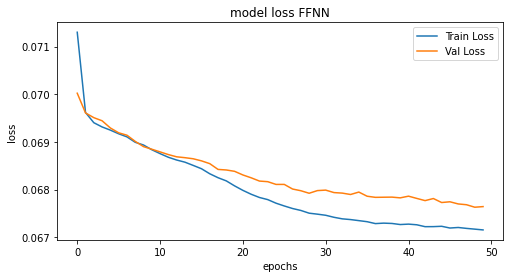

In [183]:
# Train vs Test Loss plot over epochs

plt.figure(figsize=(8,4))
plt.plot(history_exp1.history['loss'], label='Train Loss')
plt.plot(history_exp1.history['val_loss'], label='Val Loss')
plt.title('model loss FFNN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

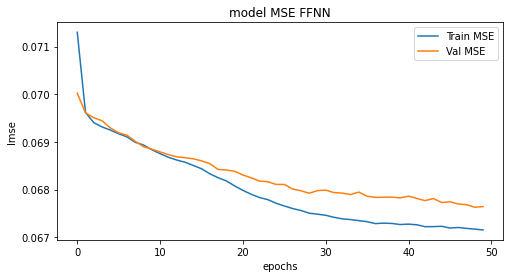

In [184]:
# Train vs Test MSE plot over epochs

plt.figure(figsize=(8,4))
plt.plot(history_exp1.history['mse'], label='Train MSE')
plt.plot(history_exp1.history['val_mse'], label='Val MSE')
plt.title('model MSE FFNN')
plt.ylabel('lmse')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

In [185]:
# Predict the X_test using the model to see how well the model performs

ypred1 = model_exp1.predict(X_test_1)

In [186]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_ffnn1 = sqrt(mean_squared_error(y_test_1, ypred1))
print('Test RMSE: %.3f' % rmse_ffnn1)

Test RMSE: 0.260


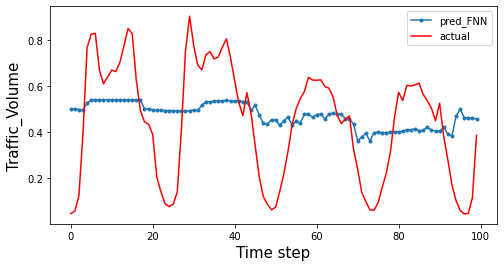

In [187]:
# Plotting the Prediction of the model vs the Actual test values for the traffic volume

aa=[x for x in range(100)]
plt.figure(figsize=(8,4))
plt.plot(aa,ypred1[:100], marker='.', label="pred_FNN")
plt.plot(aa,y_test_1[:100], 'r', label="actual")
plt.ylabel('Traffic_Volume', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=10)
plt.show();

## Results and Conclusion: 

**1. The experiment being carried out is that there are no categorical values included in the data for the modeling. Weather and Holiday data is excluded to see if the model is able to predict the traffic volume without requiring these values. Also, if the holiday and weather data are important to the model or not for the prediction can be seen.** <br>

**2. Based on the Loss and the MSE for the model build above, we can say that is doing ok in prediction but from the graph it is evident that the actual and predicted values are very different. Not only the magnitude is having huge difference but the trend upward or downwards is also not predicted accurately.** <br>

**3. It is also seen that the model stops training after 15 epochs as Early Stopping is used to prevent the model from overfitting. After 15 epochs, the validation loss is not improving consecutively for past 10 values. There is hardly any improvement after the initial few epochs for both loss and mse for train and test. Model is not able to predict the time series data properly.**

## Increasing the number of Hidden Layers and not including Weather and Holiday for Modeling

In [188]:
model_exp2 = Sequential()
model_exp2.add(Dense(12, input_dim=X_train_1.shape[1], kernel_initializer='normal',use_bias=True, activation='relu'))
model_exp2.add(Dense(12, activation='relu',use_bias=True))
model_exp2.add(Dense(12, activation='relu',use_bias=True))
#model_exp2.add(Dense(12, activation='relu',use_bias=True))
model_exp2.add(Dropout(0.2))
model_exp2.add(Dense(1, activation='sigmoid'))
model_exp2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 12)                84        
_________________________________________________________________
dense_9 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_10 (Dense)             (None, 12)                156       
_________________________________________________________________
dropout_2 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 13        
Total params: 409
Trainable params: 409
Non-trainable params: 0
_________________________________________________________________


In [189]:
model_exp2.compile(loss='mse',optimizer='RMSprop',metrics=['mse'])

In [190]:
history_exp2 = model_exp2.fit(X_train_1, y_train_1, epochs=50, batch_size=100, validation_data=(X_test_1, y_test_1), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10, mode="min")], verbose=1,shuffle=False)

Epoch 1/50
261/261 [==============================] - 0s 2ms/step - loss: 0.0728 - mse: 0.0728 - val_loss: 0.0701 - val_mse: 0.0701
Epoch 2/50
261/261 [==============================] - 0s 994us/step - loss: 0.0702 - mse: 0.0702 - val_loss: 0.0689 - val_mse: 0.0689
Epoch 3/50
261/261 [==============================] - 0s 1ms/step - loss: 0.0695 - mse: 0.0695 - val_loss: 0.0688 - val_mse: 0.0688
Epoch 4/50
261/261 [==============================] - 0s 1ms/step - loss: 0.0689 - mse: 0.0689 - val_loss: 0.0687 - val_mse: 0.0687
Epoch 5/50
261/261 [==============================] - 0s 1ms/step - loss: 0.0687 - mse: 0.0687 - val_loss: 0.0687 - val_mse: 0.0687
Epoch 6/50
261/261 [==============================] - 0s 1ms/step - loss: 0.0685 - mse: 0.0685 - val_loss: 0.0688 - val_mse: 0.0688
Epoch 7/50
261/261 [==============================] - 0s 1ms/step - loss: 0.0681 - mse: 0.0681 - val_loss: 0.0686 - val_mse: 0.0686
Epoch 8/50
261/261 [==============================] - 0s 1ms/step - loss: 

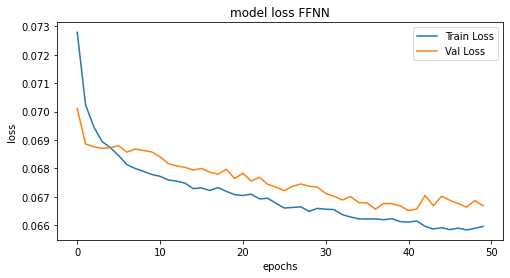

In [191]:
plt.figure(figsize=(8,4))
plt.plot(history_exp2.history['loss'], label='Train Loss')
plt.plot(history_exp2.history['val_loss'], label='Val Loss')
plt.title('model loss FFNN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

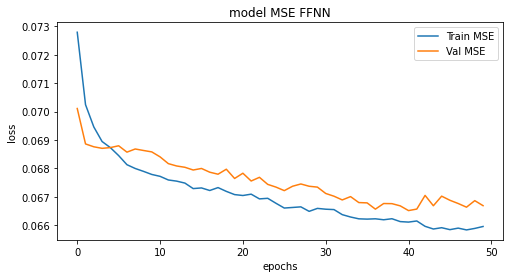

In [192]:
plt.figure(figsize=(8,4))
plt.plot(history_exp2.history['mse'], label='Train MSE')
plt.plot(history_exp2.history['val_mse'], label='Val MSE')
plt.title('model MSE FFNN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

In [193]:
ypred2 = model_exp2.predict(X_test_1)

In [194]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_ffnn2 = sqrt(mean_squared_error(y_test_1, ypred2))
print('Test RMSE: %.3f' % rmse_ffnn2)

Test RMSE: 0.258


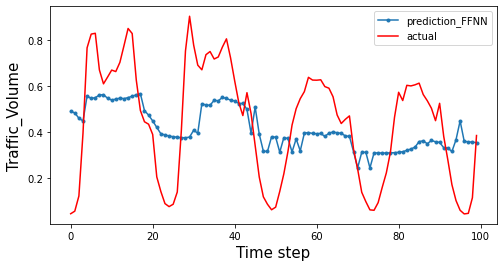

In [195]:
aa=[x for x in range(100)]
plt.figure(figsize=(8,4))
plt.plot(aa, ypred2[:100], marker='.', label="prediction_FFNN")
plt.plot(aa, y_test_1[:100], 'r', label="actual")
plt.ylabel('Traffic_Volume', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=10)
plt.show();

## Results and Conclusion: 

**1. The experiment being carried out is that there are no categorical values included in the data for the modeling. Weather and Holiday data is excluded. The Only change from the previous model is that number of hidden layers are increased by 1 and the neurons doubled for each of the layer increasing the number of the weight parameters that would be updated. The number of weights to be changed have increased by 5 times in this experiment.** <br>

**2. From the prediction graph, it is seen that the model is performing almost the same with increase in the complexity being 5 times more. There is hardly any difference in the prediction and also very slight change in the mse and the loss.** <br>

**3. It is also seen that the model stops training after 27 epochs as Early Stopping is used. This time the validation loss is still improving after 15 epochs as compared to earlier 15 epochs. Model is not able to predict the time series data properly.**

## Weather Desc column used with 9 unique weather conditions for Modeling

In [196]:
exp = abc5[abc5.date_time.between(('2013-01-01 00:00:00'),('2013-12-31 23:00:00')) | abc5.date_time.between(('2015-07-01 00:00:00'),('2018-09-30 23:00:00'))]

In [197]:
exp_2 = exp.drop(columns=['holiday','weather_main','weather_description','date_time'])

In [198]:
exp_2.head()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,Day_Week,Weekend,weather_desc
date_time_new,,,,,,,,
2013-01-01 00:00:00,-9.66,0.0,0.0,58.0,1439.0,1,0,clouds
2013-01-01 01:00:00,-9.37,0.0,0.0,40.0,1502.0,1,0,clouds
2013-01-01 02:00:00,-8.99,0.0,0.0,75.0,933.0,1,0,snow
2013-01-01 03:00:00,-9.20,0.0,0.0,90.0,576.0,1,0,clouds
2013-01-01 04:00:00,-9.50,0.0,0.0,90.0,372.0,1,0,clouds


In [199]:
# Label encoding the new weather column with 9 unique values

exp_2['weather_desc'] = le.fit_transform(exp_2['weather_desc'])

In [200]:
exp_2 = exp_2.reindex(columns=['temp','rain_1h','snow_1h','clouds_all','Day_Week','Weekend','weather_desc','traffic_volume'])

In [201]:
# Scaling the data using MinMax Scaler in the range 0 to 1

scaler = MinMaxScaler(feature_range=(0, 1))
expe_2 = scaler.fit_transform(exp_2)

In [202]:
exp_2 = pd.DataFrame(expe_2, columns=exp_2.columns, index=exp_2.index)

In [203]:
X_2 = exp_2[['temp','rain_1h','snow_1h','clouds_all','Day_Week','Weekend','weather_desc']]

In [204]:
y_2 = exp_2['traffic_volume']

In [205]:
# Sequentially splitting the data into train and test in the ratio 70:30

X_train_2, X_test_2, y_train_2, y_test_2 =  X_2[:26089], X_2[26089:] , y_2[:26089], y_2[26089:]

In [206]:
# Bulid the model

model_exp3 = Sequential()
model_exp3.add(Dense(12, input_dim=X_train_2.shape[1], kernel_initializer='normal',use_bias=True, activation='relu'))
model_exp3.add(Dense(12, activation='relu',use_bias=True))
model_exp3.add(Dense(12, activation='relu',use_bias=True))
model_exp3.add(Dropout(0.2))
model_exp3.add(Dense(1, activation='sigmoid'))
model_exp3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 12)                96        
_________________________________________________________________
dense_13 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_14 (Dense)             (None, 12)                156       
_________________________________________________________________
dropout_3 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 13        
Total params: 421
Trainable params: 421
Non-trainable params: 0
_________________________________________________________________


In [207]:
# Compile the model with loss function and optimizer defined

model_exp3.compile(loss='mse',optimizer='adam',metrics=['mse'])

In [208]:
# Train the model

history_exp3 = model_exp3.fit(X_train_2, y_train_2, epochs=50, batch_size=100, validation_data=(X_test_2, y_test_2), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1,shuffle=False)

Epoch 1/50
261/261 [==============================] - 0s 2ms/step - loss: 0.0728 - mse: 0.0728 - val_loss: 0.0700 - val_mse: 0.0700
Epoch 2/50
261/261 [==============================] - 0s 1ms/step - loss: 0.0699 - mse: 0.0699 - val_loss: 0.0685 - val_mse: 0.0685
Epoch 3/50
261/261 [==============================] - 0s 2ms/step - loss: 0.0692 - mse: 0.0692 - val_loss: 0.0683 - val_mse: 0.0683
Epoch 4/50
261/261 [==============================] - 0s 1ms/step - loss: 0.0689 - mse: 0.0689 - val_loss: 0.0680 - val_mse: 0.0680
Epoch 5/50
261/261 [==============================] - 0s 1ms/step - loss: 0.0688 - mse: 0.0688 - val_loss: 0.0680 - val_mse: 0.0680
Epoch 6/50
261/261 [==============================] - 0s 1ms/step - loss: 0.0687 - mse: 0.0687 - val_loss: 0.0679 - val_mse: 0.0679
Epoch 7/50
261/261 [==============================] - 0s 1ms/step - loss: 0.0688 - mse: 0.0688 - val_loss: 0.0680 - val_mse: 0.0680
Epoch 8/50
261/261 [==============================] - 0s 1ms/step - loss: 0.

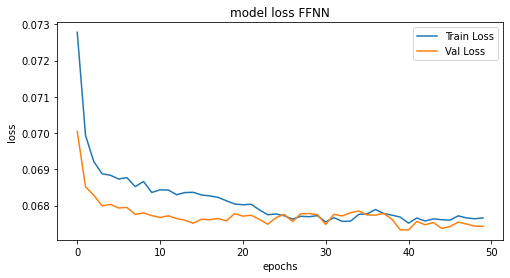

In [209]:
# Train vs Test Loss plotted 

plt.figure(figsize=(8,4))
plt.plot(history_exp3.history['loss'], label='Train Loss')
plt.plot(history_exp3.history['val_loss'], label='Val Loss')
plt.title('model loss FFNN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

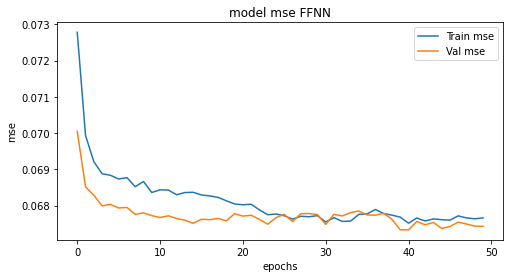

In [210]:
# Train vs Test MSE 

plt.figure(figsize=(8,4))
plt.plot(history_exp3.history['mse'], label='Train mse')
plt.plot(history_exp3.history['val_mse'], label='Val mse')
plt.title('model mse FFNN')
plt.ylabel('mse')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

In [211]:
# Predict the Test data using the model fitted

ypred3 = model_exp3.predict(X_test_2)

In [212]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_ffnn3 = sqrt(mean_squared_error(y_test_1, ypred3))
print('Test RMSE: %.3f' % rmse_ffnn3)

Test RMSE: 0.260


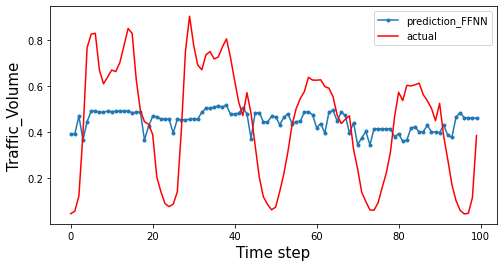

In [213]:
aa=[x for x in range(100)]
plt.figure(figsize=(8,4))
plt.plot(aa, ypred3[:100], marker='.', label="prediction_FFNN")
plt.plot(aa, y_test_2[:100], 'r', label="actual")
plt.ylabel('Traffic_Volume', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=10)
plt.show();

## Results and Conclusion: 

**1. The experiment being carried out is that Weather Desc column with 9 unique weather conditions label encoded values are included to predict the traffic volume. This experiment would show if weather feature is important or not for the model prediction.** <br>

**2. Based on the Loss and the MSE for the model build above, weather is important to the model as the loss and mse are reduced and improving beyond 20+ epochs. The prediction trend as seen from the graph is somewhat able to capture the original trend even though not matching the same magnitude as the actual.** <br>

**3. There is very little improvement in the prediction but it is clear that weather data is useful for the model to do prediction. The prediction pattern has improved slighlty stating that weather column is useful.**

## Holiday and Weather Desc both the categorical values used for Modeling

In [214]:
exp = abc5[abc5.date_time.between(('2013-01-01 00:00:00'),('2013-12-31 23:00:00')) | abc5.date_time.between(('2015-07-01 00:00:00'),('2018-09-30 23:00:00'))]

In [215]:
exp_3 = exp.drop(columns=['weather_main','weather_description','date_time'])

In [216]:
exp_3.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,traffic_volume,Day_Week,Weekend,weather_desc
date_time_new,,,,,,,,,
2013-01-01 00:00:00,New Years Day,-9.66,0.0,0.0,58.0,1439.0,1,0,clouds
2013-01-01 01:00:00,New Years Day,-9.37,0.0,0.0,40.0,1502.0,1,0,clouds
2013-01-01 02:00:00,New Years Day,-8.99,0.0,0.0,75.0,933.0,1,0,snow
2013-01-01 03:00:00,New Years Day,-9.20,0.0,0.0,90.0,576.0,1,0,clouds
2013-01-01 04:00:00,New Years Day,-9.50,0.0,0.0,90.0,372.0,1,0,clouds


In [217]:
# Label encoding both Holiday and Weather Desc variables

exp_3['holiday'] = le.fit_transform(exp_3['holiday'])
exp_3['weather_desc'] = le.fit_transform(exp_3['weather_desc'])


In [218]:
exp_3 = exp_3.reindex(columns=['holiday','temp','rain_1h','snow_1h','clouds_all','Day_Week','Weekend','weather_desc','traffic_volume'])

In [219]:
# Scaling the data using MinMax Scaler

scaler = MinMaxScaler(feature_range=(0, 1))
expe_3 = scaler.fit_transform(exp_3)

In [220]:
exp_3 = pd.DataFrame(expe_3, columns=exp_3.columns, index=exp_3.index)

In [221]:
X_3 = exp_3[['holiday','temp','rain_1h','snow_1h','clouds_all','Day_Week','Weekend','weather_desc']]

In [222]:
y_3 = exp_3['traffic_volume']

In [223]:
X_train_3, X_test_3, y_train_3, y_test_3 =  X_3[:26089], X_3[26089:] , y_3[:26089], y_3[26089:]

In [224]:
# Build the model

model_exp4 = Sequential()
model_exp4.add(Dense(12, input_dim=X_train_3.shape[1], kernel_initializer='normal',use_bias=True, activation='relu'))
model_exp4.add(Dense(24, activation='relu',use_bias=True))
model_exp4.add(Dense(30, activation='relu',use_bias=True))
model_exp4.add(Dropout(0.2))
model_exp4.add(Dense(1, activation='sigmoid'))
model_exp4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 12)                108       
_________________________________________________________________
dense_17 (Dense)             (None, 24)                312       
_________________________________________________________________
dense_18 (Dense)             (None, 30)                750       
_________________________________________________________________
dropout_4 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 31        
Total params: 1,201
Trainable params: 1,201
Non-trainable params: 0
_________________________________________________________________


In [225]:
# Compile the model for loss function and optimizer

model_exp4.compile(loss='mse',optimizer='adam',metrics=['mse'])

In [226]:
# Train the model

history_exp4 = model_exp4.fit(X_train_3, y_train_3, epochs=50, batch_size=100, validation_data=(X_test_3, y_test_3), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1,shuffle=False)

Epoch 1/50
261/261 [==============================] - 0s 1ms/step - loss: 0.0720 - mse: 0.0720 - val_loss: 0.0694 - val_mse: 0.0694
Epoch 2/50
261/261 [==============================] - 0s 1ms/step - loss: 0.0691 - mse: 0.0691 - val_loss: 0.0679 - val_mse: 0.0679
Epoch 3/50
261/261 [==============================] - 0s 1ms/step - loss: 0.0685 - mse: 0.0685 - val_loss: 0.0677 - val_mse: 0.0677
Epoch 4/50
261/261 [==============================] - 0s 2ms/step - loss: 0.0683 - mse: 0.0683 - val_loss: 0.0675 - val_mse: 0.0675
Epoch 5/50
261/261 [==============================] - 0s 1ms/step - loss: 0.0680 - mse: 0.0680 - val_loss: 0.0674 - val_mse: 0.0674
Epoch 6/50
261/261 [==============================] - 0s 1ms/step - loss: 0.0680 - mse: 0.0680 - val_loss: 0.0672 - val_mse: 0.0672
Epoch 7/50
261/261 [==============================] - 0s 1ms/step - loss: 0.0679 - mse: 0.0679 - val_loss: 0.0670 - val_mse: 0.0670
Epoch 8/50
261/261 [==============================] - 0s 1ms/step - loss: 0.

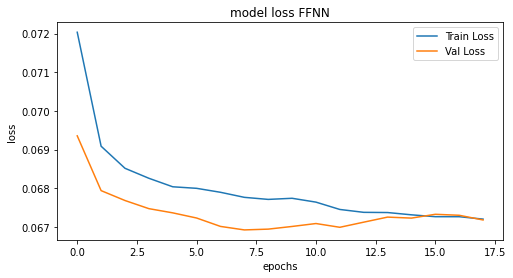

In [227]:
# Plotting the Train vs Test Loss

plt.figure(figsize=(8,4))
plt.plot(history_exp4.history['loss'], label='Train Loss')
plt.plot(history_exp4.history['val_loss'], label='Val Loss')
plt.title('model loss FFNN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

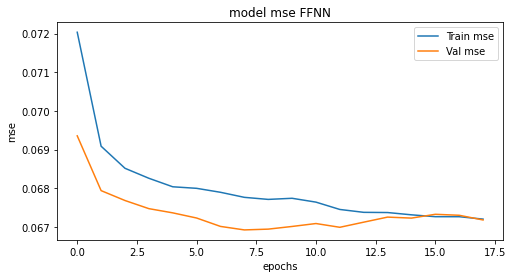

In [228]:
# Plotting the Train vs Test MSE

plt.figure(figsize=(8,4))
plt.plot(history_exp4.history['mse'], label='Train mse')
plt.plot(history_exp4.history['val_mse'], label='Val mse')
plt.title('model mse FFNN')
plt.ylabel('mse')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

In [229]:
# Predicting the X_test using the fitted model

ypred4 = model_exp4.predict(X_test_3)

In [230]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_ffnn4 = sqrt(mean_squared_error(y_test_1, ypred4))
print('Test RMSE: %.3f' % rmse_ffnn4)

Test RMSE: 0.259


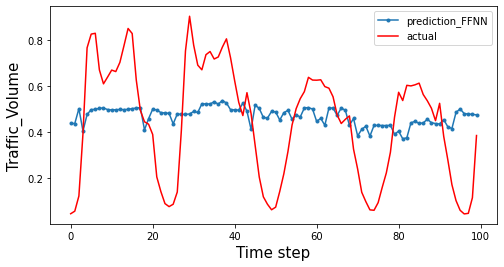

In [231]:
# Plot prediction vs actual 

aa=[x for x in range(100)]
plt.figure(figsize=(8,4))
plt.plot(aa, ypred4[:100], marker='.', label="prediction_FFNN")
plt.plot(aa, y_test_3[:100], 'r', label="actual")
plt.ylabel('Traffic_Volume', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=10)
plt.show();

## Results and Conclusion: 

**1. The experiment being carried out is that both categorical values are included in the data for the modeling, Weather and Holiday data. These variables are label encoded to be feed to the model.** <br>

**2. Based on the Loss and the MSE for the model build above, the validation loss is still reducing slighly even after 35+ epochs until 40 epochs.** <br>

**3. From the prediction graph, it is seen that both weather and holiday data are useful. Earlier, we found weather data useful now holiday data is slighly adding to it to make it better for the prediction made by the model.**

## Holiday, Weather and Snow all the features binarized for the Model

In [232]:
abc9.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,traffic_volume,Day_Week,Weekend,weather_desc,snow_bin,holi,weather_bin,date_time_new
date_time_new,,,,,,,,,,,,,
2013-01-01 00:00:00,1,-9.66,0.0,0.0,58.0,1439.0,1,0,1,0,1,1,2013-01-01 00:00:00
2013-01-01 01:00:00,1,-9.37,0.0,0.0,40.0,1502.0,1,0,1,0,1,1,2013-01-01 01:00:00
2013-01-01 02:00:00,1,-8.99,0.0,0.0,75.0,933.0,1,0,7,0,1,0,2013-01-01 02:00:00
2013-01-01 03:00:00,1,-9.20,0.0,0.0,90.0,576.0,1,0,1,0,1,1,2013-01-01 03:00:00
2013-01-01 04:00:00,1,-9.50,0.0,0.0,90.0,372.0,1,0,1,0,1,1,2013-01-01 04:00:00


In [233]:
exp_4 = abc9.drop(columns=['snow_1h','weather_desc','holi','date_time_new'])

In [234]:
exp_4.head()

,holiday,temp,rain_1h,clouds_all,traffic_volume,Day_Week,Weekend,snow_bin,weather_bin
date_time_new,,,,,,,,,
2013-01-01 00:00:00,1,-9.66,0.0,58.0,1439.0,1,0,0,1
2013-01-01 01:00:00,1,-9.37,0.0,40.0,1502.0,1,0,0,1
2013-01-01 02:00:00,1,-8.99,0.0,75.0,933.0,1,0,0,0
2013-01-01 03:00:00,1,-9.20,0.0,90.0,576.0,1,0,0,1
2013-01-01 04:00:00,1,-9.50,0.0,90.0,372.0,1,0,0,1


In [235]:
exp_4 = exp_4.reindex(columns=['holiday','temp','rain_1h','clouds_all','Day_Week','Weekend','snow_bin','weather_bin','traffic_volume'])

In [236]:
scaler = MinMaxScaler(feature_range=(0, 1))
expe_4 = scaler.fit_transform(exp_4)

In [237]:
exp_4 = pd.DataFrame(expe_4, columns=exp_4.columns, index=exp_4.index)

In [238]:
X_4 = exp_4[['holiday','temp','rain_1h','clouds_all','Day_Week','Weekend','snow_bin','weather_bin']]

In [239]:
y_4 = exp_4['traffic_volume']

In [240]:
X_train_4, X_test_4, y_train_4, y_test_4 =  X_4[:26089], X_4[26089:] , y_4[:26089], y_4[26089:]

In [241]:
model_exp5 = Sequential()
model_exp5.add(Dense(12, input_dim=X_train_4.shape[1], kernel_initializer='normal',use_bias=True, activation='relu'))
model_exp5.add(Dense(12, activation='relu',use_bias=True))
model_exp5.add(Dense(12, activation='relu',use_bias=True))
model_exp5.add(Dropout(0.3))
model_exp5.add(Dense(1, activation='sigmoid'))
model_exp5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 12)                108       
_________________________________________________________________
dense_21 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_22 (Dense)             (None, 12)                156       
_________________________________________________________________
dropout_5 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 13        
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________


In [242]:
model_exp5.compile(loss='mse',optimizer='adam',metrics=['mse'])

In [243]:
history_exp5 = model_exp5.fit(X_train_4, y_train_4, epochs=50, batch_size=100, validation_data=(X_test_4, y_test_4), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1,shuffle=False)

Epoch 1/50
261/261 [==============================] - 1s 2ms/step - loss: 0.0730 - mse: 0.0730 - val_loss: 0.0714 - val_mse: 0.0714
Epoch 2/50
261/261 [==============================] - 0s 1ms/step - loss: 0.0704 - mse: 0.0704 - val_loss: 0.0695 - val_mse: 0.0695
Epoch 3/50
261/261 [==============================] - 0s 1ms/step - loss: 0.0695 - mse: 0.0695 - val_loss: 0.0689 - val_mse: 0.0689
Epoch 4/50
261/261 [==============================] - 0s 1ms/step - loss: 0.0692 - mse: 0.0692 - val_loss: 0.0686 - val_mse: 0.0686
Epoch 5/50
261/261 [==============================] - 0s 1ms/step - loss: 0.0689 - mse: 0.0689 - val_loss: 0.0683 - val_mse: 0.0683
Epoch 6/50
261/261 [==============================] - 0s 1ms/step - loss: 0.0688 - mse: 0.0688 - val_loss: 0.0684 - val_mse: 0.0684
Epoch 7/50
261/261 [==============================] - 0s 985us/step - loss: 0.0688 - mse: 0.0688 - val_loss: 0.0681 - val_mse: 0.0681
Epoch 8/50
261/261 [==============================] - 0s 1ms/step - loss: 

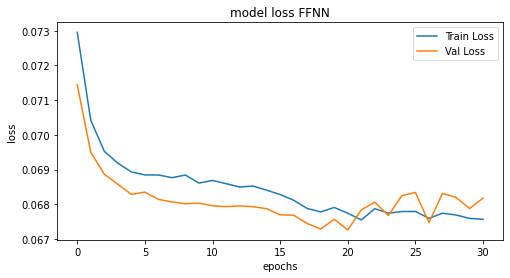

In [244]:
plt.figure(figsize=(8,4))
plt.plot(history_exp5.history['loss'], label='Train Loss')
plt.plot(history_exp5.history['val_loss'], label='Val Loss')
plt.title('model loss FFNN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

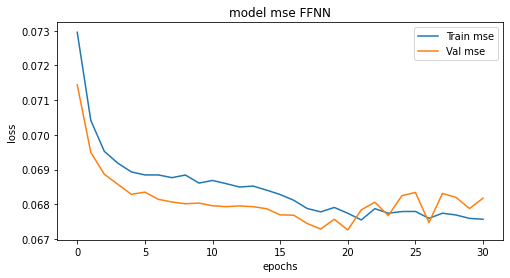

In [245]:
plt.figure(figsize=(8,4))
plt.plot(history_exp5.history['mse'], label='Train mse')
plt.plot(history_exp5.history['val_mse'], label='Val mse')
plt.title('model mse FFNN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

In [246]:
ypred5 = model_exp5.predict(X_test_4)

In [247]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_ffnn5 = sqrt(mean_squared_error(y_test_1, ypred5))
print('Test RMSE: %.3f' % rmse_ffnn5)

Test RMSE: 0.261


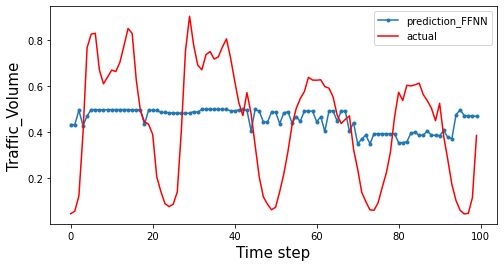

In [248]:
aa=[x for x in range(100)]
plt.figure(figsize=(8,4))
plt.plot(aa, ypred5[:100], marker='.', label="prediction_FFNN")
plt.plot(aa, y_test_4[:100], 'r', label="actual")
plt.ylabel('Traffic_Volume', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=10)
plt.show();

## Results and Conclusion: 

**1. The experiment being carried out is that if using binary values for holiday, weather and snow effect the model performance or not. Weather is categorized as bad or good, holiday as Holiday or No Holiday and Snow as Snow or No Snow.** <br>

**2. The mse and loss have increased and the model is stopping training early indicating binary values are slighly reducing the model performance and not adding to it.** <br>

**3. Even though all the predictions graphs seem to be same for all the experiments carried out for FFNN, this model is not predicting the volume accurately. Binarized variables have reduced the model's prediction capability.**

## Entity Embedding for Weather Description used for Model Building

In [249]:
pd.set_option('display.max_columns', None)
X_emd_holi.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_description,Day_Week,Weekend,weather_description_0,weather_description_1,weather_description_2,weather_description_3,weather_description_4,weather_description_5,weather_description_6,weather_description_7,weather_description_8,weather_description_9,weather_description_10,weather_description_11,weather_description_12,weather_description_13,weather_description_14,weather_description_15,weather_description_16,holiday_0,holiday_1,holiday_2,holiday_3,holiday_4,holiday_5
date_time_new,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-10-02 09:00:00,7,15.13,0.0,0.0,40.0,22,1,0,0.031465,0.012169,0.037085,0.045770,-0.026736,-0.012904,-0.016349,0.032065,-0.043152,0.019958,0.029215,0.048114,-0.018660,0.027697,0.019207,0.023567,0.009052,0.231943,0.216827,0.219285,-0.229154,-0.221409,-0.230196
2012-10-02 10:00:00,7,16.21,0.0,0.0,75.0,0,1,0,-0.016661,-0.022498,0.036220,-0.015901,0.004448,0.014672,0.053487,-0.015731,-0.008376,-0.035461,-0.017749,-0.037311,0.034050,-0.002877,-0.004970,0.022509,-0.053021,0.231943,0.216827,0.219285,-0.229154,-0.221409,-0.230196
2012-10-02 11:00:00,7,16.43,0.0,0.0,90.0,17,1,0,-0.005926,0.038499,0.028960,-0.048563,0.001828,0.025392,-0.008845,-0.041474,-0.040918,0.046879,-0.039981,0.036648,-0.012834,0.007176,-0.024486,0.010968,0.008610,0.231943,0.216827,0.219285,-0.229154,-0.221409,-0.230196
2012-10-02 12:00:00,7,16.98,0.0,0.0,90.0,17,1,0,-0.005926,0.038499,0.028960,-0.048563,0.001828,0.025392,-0.008845,-0.041474,-0.040918,0.046879,-0.039981,0.036648,-0.012834,0.007176,-0.024486,0.010968,0.008610,0.231943,0.216827,0.219285,-0.229154,-0.221409,-0.230196
2012-10-02 13:00:00,7,17.99,0.0,0.0,75.0,0,1,0,-0.016661,-0.022498,0.036220,-0.015901,0.004448,0.014672,0.053487,-0.015731,-0.008376,-0.035461,-0.017749,-0.037311,0.034050,-0.002877,-0.004970,0.022509,-0.053021,0.231943,0.216827,0.219285,-0.229154,-0.221409,-0.230196


In [250]:
X_emd_holi['date_time'] = X_emd_holi.index

In [251]:

exp_5 = X_emd_holi[X_emd_holi.date_time.between(('2013-01-01 00:00:00'),('2013-12-31 23:00:00')) | X_emd_holi.date_time.between(('2015-07-01 00:00:00'),('2018-09-30 23:00:00'))]

In [252]:
exp_5.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_description,Day_Week,Weekend,weather_description_0,weather_description_1,weather_description_2,weather_description_3,weather_description_4,weather_description_5,weather_description_6,weather_description_7,weather_description_8,weather_description_9,weather_description_10,weather_description_11,weather_description_12,weather_description_13,weather_description_14,weather_description_15,weather_description_16,holiday_0,holiday_1,holiday_2,holiday_3,holiday_4,holiday_5,date_time
date_time_new,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00,6,-9.66,0.0,0.0,58.0,0,1,0,-0.016661,-0.022498,0.036220,-0.015901,0.004448,0.014672,0.053487,-0.015731,-0.008376,-0.035461,-0.017749,-0.037311,0.034050,-0.002877,-0.004970,0.022509,-0.053021,-0.004975,0.062754,-0.019169,0.02856,0.022419,0.018116,2013-01-01 00:00:00
2013-01-01 01:00:00,6,-9.37,0.0,0.0,40.0,22,1,0,0.031465,0.012169,0.037085,0.045770,-0.026736,-0.012904,-0.016349,0.032065,-0.043152,0.019958,0.029215,0.048114,-0.018660,0.027697,0.019207,0.023567,0.009052,-0.004975,0.062754,-0.019169,0.02856,0.022419,0.018116,2013-01-01 01:00:00
2013-01-01 02:00:00,6,-8.99,0.0,0.0,75.0,8,1,0,-0.014757,-0.026672,-0.047287,0.043719,-0.009162,-0.032863,-0.032607,-0.028033,-0.011477,0.012140,-0.017162,-0.046328,0.039355,-0.018181,-0.003902,0.031141,0.043633,-0.004975,0.062754,-0.019169,0.02856,0.022419,0.018116,2013-01-01 02:00:00
2013-01-01 03:00:00,6,-9.20,0.0,0.0,90.0,17,1,0,-0.005926,0.038499,0.028960,-0.048563,0.001828,0.025392,-0.008845,-0.041474,-0.040918,0.046879,-0.039981,0.036648,-0.012834,0.007176,-0.024486,0.010968,0.008610,-0.004975,0.062754,-0.019169,0.02856,0.022419,0.018116,2013-01-01 03:00:00
2013-01-01 04:00:00,6,-9.50,0.0,0.0,90.0,17,1,0,-0.005926,0.038499,0.028960,-0.048563,0.001828,0.025392,-0.008845,-0.041474,-0.040918,0.046879,-0.039981,0.036648,-0.012834,0.007176,-0.024486,0.010968,0.008610,-0.004975,0.062754,-0.019169,0.02856,0.022419,0.018116,2013-01-01 04:00:00


In [253]:
exp_5.shape

(37271, 32)

In [254]:
# Entity Embedding included for Weather data only

exp_5 = exp_5.drop(columns=['holiday','weather_description','date_time','holiday_0', 'holiday_1', 'holiday_2','holiday_3', 'holiday_4', 'holiday_5'])

In [255]:
exp_5.columns

Index(['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'Day_Week', 'Weekend',
       'weather_description_0', 'weather_description_1',
       'weather_description_2', 'weather_description_3',
       'weather_description_4', 'weather_description_5',
       'weather_description_6', 'weather_description_7',
       'weather_description_8', 'weather_description_9',
       'weather_description_10', 'weather_description_11',
       'weather_description_12', 'weather_description_13',
       'weather_description_14', 'weather_description_15',
       'weather_description_16'],
      dtype='object')

In [256]:
exp_5['traffic_volume'] = exp_2['traffic_volume']

In [257]:
exp_5.columns

Index(['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'Day_Week', 'Weekend',
       'weather_description_0', 'weather_description_1',
       'weather_description_2', 'weather_description_3',
       'weather_description_4', 'weather_description_5',
       'weather_description_6', 'weather_description_7',
       'weather_description_8', 'weather_description_9',
       'weather_description_10', 'weather_description_11',
       'weather_description_12', 'weather_description_13',
       'weather_description_14', 'weather_description_15',
       'weather_description_16', 'traffic_volume'],
      dtype='object')

In [258]:
# Scaling the data 

scaler = MinMaxScaler(feature_range=(0, 1))
expe_5 = scaler.fit_transform(exp_5)

In [259]:
exp_5 = pd.DataFrame(expe_5, columns=exp_5.columns, index=exp_5.index)

In [260]:
X_5 = exp_5.iloc[:,:-1]

In [261]:
X_5.shape

(37271, 23)

In [262]:
y_5 = exp_5['traffic_volume']

In [263]:
X_train_5, X_test_5, y_train_5, y_test_5 =  X_5[:26089], X_5[26089:] , y_5[:26089], y_5[26089:]

In [264]:
X_test_5

,temp,rain_1h,snow_1h,clouds_all,Day_Week,Weekend,weather_description_0,weather_description_1,weather_description_2,weather_description_3,weather_description_4,weather_description_5,weather_description_6,weather_description_7,weather_description_8,weather_description_9,weather_description_10,weather_description_11,weather_description_12,weather_description_13,weather_description_14,weather_description_15,weather_description_16
date_time_new,,,,,,,,,,,,,,,,,,,,,,,
2017-06-22 02:00:00,0.763197,0.0,0.0,0.01,0.5,0.0,0.359566,0.372840,0.554614,0.554658,0.665928,0.386834,0.531854,0.405818,0.163196,0.244575,0.649110,0.659546,0.206132,0.576041,0.609972,0.321788,0.616748
2017-06-22 03:00:00,0.758248,0.0,0.0,0.01,0.5,0.0,0.178005,0.299653,0.928081,0.253423,0.359016,0.246116,0.438379,0.639662,0.801044,0.099789,0.719111,0.725810,0.858066,0.826854,0.083082,0.270567,0.038218
2017-06-22 04:00:00,0.742352,0.0,0.0,0.01,0.5,0.0,1.000000,1.000000,0.059815,0.833866,0.926975,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.187872,1.000000,0.896357,0.942414
2017-06-22 05:00:00,0.734103,0.0,0.0,0.01,0.5,0.0,0.248441,0.209072,0.896590,0.381765,0.289968,0.215087,0.590921,0.475243,0.668139,0.264371,0.803808,0.780895,0.374405,0.494194,0.489652,0.301842,0.546828
2017-06-22 06:00:00,0.733203,0.0,0.0,0.40,0.5,0.0,0.359566,0.372840,0.554614,0.554658,0.665928,0.386834,0.531854,0.405818,0.163196,0.244575,0.649110,0.659546,0.206132,0.576041,0.609972,0.321788,0.616748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,0.600780,0.0,0.0,0.75,1.0,1.0,0.137513,0.083754,0.945583,0.124046,0.246341,0.312669,0.510934,0.727247,0.694942,0.035499,0.672828,0.614667,0.923634,0.816153,0.200618,0.217320,0.000000
2018-09-30 20:00:00,0.590432,0.0,0.0,0.90,1.0,1.0,0.190855,0.309186,0.911673,0.000000,0.234688,0.366028,0.198130,0.606272,0.506129,0.501866,0.570273,0.945397,0.690726,0.855199,0.113049,0.175034,0.275186
2018-09-30 21:00:00,0.589982,0.0,0.0,0.90,1.0,1.0,0.248441,0.209072,0.896590,0.381765,0.289968,0.215087,0.590921,0.475243,0.668139,0.264371,0.803808,0.780895,0.374405,0.494194,0.489652,0.301842,0.546828


In [265]:
model_exp6 = Sequential()
model_exp6.add(Dense(12, input_dim=X_train_5.shape[1], kernel_initializer='normal',use_bias=True, activation='relu'))
model_exp6.add(Dense(12, activation='relu',use_bias=True))
model_exp6.add(Dense(12, activation='relu',use_bias=True))
model_exp6.add(Dropout(0.2))
model_exp6.add(Dense(1, activation='sigmoid'))
model_exp6.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 12)                288       
_________________________________________________________________
dense_25 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_26 (Dense)             (None, 12)                156       
_________________________________________________________________
dropout_6 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 13        
Total params: 613
Trainable params: 613
Non-trainable params: 0
_________________________________________________________________


In [266]:
model_exp6.compile(loss='mse',optimizer='adam',metrics=['mse'])

In [267]:
history_exp6 = model_exp6.fit(X_train_5, y_train_5, epochs=50, batch_size=100, validation_data=(X_test_5, y_test_5), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1,shuffle=False)

Epoch 1/50
261/261 [==============================] - 0s 2ms/step - loss: 0.0734 - mse: 0.0734 - val_loss: 0.0707 - val_mse: 0.0707
Epoch 2/50
261/261 [==============================] - 0s 1ms/step - loss: 0.0713 - mse: 0.0713 - val_loss: 0.0687 - val_mse: 0.0687
Epoch 3/50
261/261 [==============================] - 0s 1ms/step - loss: 0.0702 - mse: 0.0702 - val_loss: 0.0682 - val_mse: 0.0682
Epoch 4/50
261/261 [==============================] - 0s 1ms/step - loss: 0.0699 - mse: 0.0699 - val_loss: 0.0681 - val_mse: 0.0681
Epoch 5/50
261/261 [==============================] - 0s 2ms/step - loss: 0.0696 - mse: 0.0696 - val_loss: 0.0677 - val_mse: 0.0677
Epoch 6/50
261/261 [==============================] - 0s 1ms/step - loss: 0.0693 - mse: 0.0693 - val_loss: 0.0679 - val_mse: 0.0679
Epoch 7/50
261/261 [==============================] - 0s 1ms/step - loss: 0.0692 - mse: 0.0692 - val_loss: 0.0678 - val_mse: 0.0678
Epoch 8/50
261/261 [==============================] - 0s 1ms/step - loss: 0.

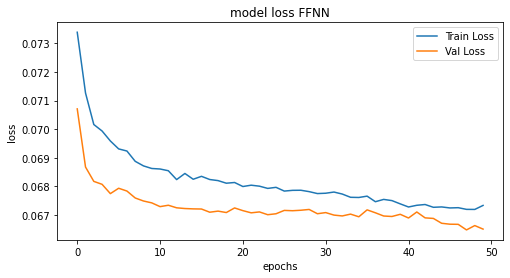

In [268]:
plt.figure(figsize=(8,4))
plt.plot(history_exp6.history['loss'], label='Train Loss')
plt.plot(history_exp6.history['val_loss'], label='Val Loss')
plt.title('model loss FFNN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

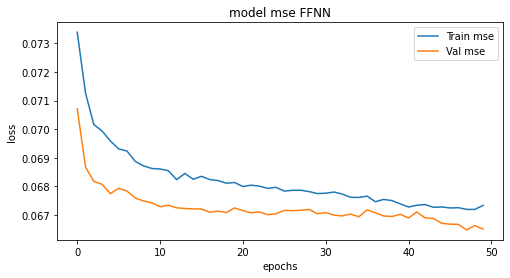

In [269]:
plt.figure(figsize=(8,4))
plt.plot(history_exp6.history['mse'], label='Train mse')
plt.plot(history_exp6.history['val_mse'], label='Val mse')
plt.title('model mse FFNN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

In [270]:
ypred6 = model_exp6.predict(X_test_5)

In [271]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_ffnn6 = sqrt(mean_squared_error(y_test_1, ypred6))
print('Test RMSE: %.3f' % rmse_ffnn6)

Test RMSE: 0.258


In [272]:
y_test_5

date_time_new
2017-06-22 02:00:00    0.046154
2017-06-22 03:00:00    0.057280
2017-06-22 04:00:00    0.123214
2017-06-22 05:00:00    0.395604
2017-06-22 06:00:00    0.767170
                         ...   
2018-09-30 19:00:00    0.486676
2018-09-30 20:00:00    0.382005
2018-09-30 21:00:00    0.296566
2018-09-30 22:00:00    0.199176
2018-09-30 23:00:00    0.131044
Name: traffic_volume, Length: 11182, dtype: float64

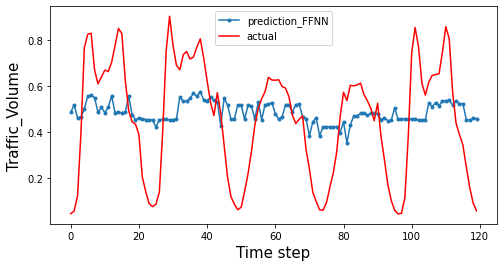

In [273]:
aa=[x for x in range(120)]
plt.figure(figsize=(8,4))
plt.plot(aa, ypred6[:120], marker='.', label="prediction_FFNN")
plt.plot(aa, y_test_5[:120], 'r', label="actual")
plt.ylabel('Traffic_Volume', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=10)
plt.show();

## Results and Conclusion: 

**1. The experiment being carried out is that we now use entity embeddings for the weather data instead of binary or label encoded data. These entity embeddings are very useful in the sense that they capture the similarities between the different weather conditions.** <br>

**2. MSE and Validation Loss have reduced slighly and the model is able to make better predictions than before.** <br>

**3. From the prediction graph, we can see that this model is performing the best so far among all the models by capturing the trend better than other and also does better on the magnitude part. We can conclude that Entity Embeddings work better than label encoding and they do increase the model performance.**

## Non Holiday Data used for Training the Model and Holiday data for Validation(Prediction)

In [274]:
df_nonholi.shape

(31680, 13)

In [275]:
df_nonholi.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,traffic_volume,Day_Week,Weekend,weather_desc,snow_bin,holi,weather_bin,date_time_new
2013-01-04 00:00:00,0,-6.81,0.0,0.0,90.0,604.0,4,0,4,0,0,1,2013-01-04 00:00:00
2013-01-04 01:00:00,0,-7.22,0.0,0.0,90.0,353.0,4,0,7,0,0,0,2013-01-04 01:00:00
2013-01-04 02:00:00,0,-7.63,0.0,0.0,90.0,301.0,4,0,7,0,0,0,2013-01-04 02:00:00
2013-01-04 03:00:00,0,-8.30,0.0,0.0,90.0,326.0,4,0,7,0,0,0,2013-01-04 03:00:00
2013-01-04 04:00:00,0,-8.66,0.0,0.0,90.0,675.0,4,0,3,0,0,0,2013-01-04 04:00:00


In [276]:
exp_7 = df_nonholi.drop(columns=['snow_1h','holi','weather_bin','date_time_new'])

In [277]:
exp_7.head()

,holiday,temp,rain_1h,clouds_all,traffic_volume,Day_Week,Weekend,weather_desc,snow_bin
2013-01-04 00:00:00,0,-6.81,0.0,90.0,604.0,4,0,4,0
2013-01-04 01:00:00,0,-7.22,0.0,90.0,353.0,4,0,7,0
2013-01-04 02:00:00,0,-7.63,0.0,90.0,301.0,4,0,7,0
2013-01-04 03:00:00,0,-8.30,0.0,90.0,326.0,4,0,7,0
2013-01-04 04:00:00,0,-8.66,0.0,90.0,675.0,4,0,3,0


In [278]:
exp_7 = exp_7.reindex(columns=['holiday','temp','rain_1h','clouds_all','Day_Week','Weekend','weather_desc','snow_bin','traffic_volume'])

In [279]:
scaler = MinMaxScaler(feature_range=(0, 1))
expe_7 = scaler.fit_transform(exp_7)

exp_7 = pd.DataFrame(expe_7, columns=exp_7.columns, index=exp_7.index)

In [280]:
X_train_6 = exp_7.iloc[:,:-1]

In [281]:
y_train_6 = exp_7['traffic_volume']

In [282]:
X_train_6.shape

(31680, 8)

In [283]:
df_11.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,traffic_volume,Day_Week,Weekend,weather_desc,snow_bin,holi,weather_bin,date_time_new
2013-01-01 00:00:00,1,-9.66,0.0,0.0,58.0,1439.0,1,0,1,0,1,1,2013-01-01 00:00:00
2013-01-01 01:00:00,1,-9.37,0.0,0.0,40.0,1502.0,1,0,1,0,1,1,2013-01-01 01:00:00
2013-01-01 02:00:00,1,-8.99,0.0,0.0,75.0,933.0,1,0,7,0,1,0,2013-01-01 02:00:00
2013-01-01 03:00:00,1,-9.20,0.0,0.0,90.0,576.0,1,0,1,0,1,1,2013-01-01 03:00:00
2013-01-01 04:00:00,1,-9.50,0.0,0.0,90.0,372.0,1,0,1,0,1,1,2013-01-01 04:00:00


In [284]:
exp_8 = df_11.drop(columns=['snow_1h','holi','weather_bin','date_time_new'])

In [285]:
exp_8 = exp_8.reindex(columns=['holiday','temp','rain_1h','clouds_all','Day_Week','Weekend','weather_desc','snow_bin','traffic_volume'])

In [286]:
scaler = MinMaxScaler(feature_range=(0, 1))
expe_8 = scaler.fit_transform(exp_8)

exp_8 = pd.DataFrame(expe_8, columns=exp_8.columns, index=exp_8.index)

In [287]:
X_test_7 = exp_8.iloc[:,:-1]

In [288]:
y_test_7 = exp_8['traffic_volume']

In [289]:
X_test_7.shape

(5591, 8)

In [290]:
model_exp7 = Sequential()
model_exp7.add(Dense(12, input_dim=X_train_6.shape[1], kernel_initializer='normal',use_bias=True, activation='relu'))
model_exp7.add(Dense(12, activation='relu',use_bias=True))
model_exp7.add(Dense(12, activation='relu',use_bias=True))
model_exp7.add(Dropout(0.3))
model_exp7.add(Dense(1, activation='sigmoid'))
model_exp7.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 12)                108       
_________________________________________________________________
dense_29 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_30 (Dense)             (None, 12)                156       
_________________________________________________________________
dropout_7 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 13        
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________


In [291]:
model_exp7.compile(loss='mse',optimizer='adam',metrics=['mse'])

In [292]:
history_exp7 = model_exp7.fit(X_train_6, y_train_6, epochs=50, batch_size=100, validation_data=(X_test_7, y_test_7), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1,shuffle=False)

Epoch 1/50
317/317 [==============================] - 1s 2ms/step - loss: 0.0737 - mse: 0.0737 - val_loss: 0.0671 - val_mse: 0.0671
Epoch 2/50
317/317 [==============================] - 1s 2ms/step - loss: 0.0708 - mse: 0.0708 - val_loss: 0.0639 - val_mse: 0.0639
Epoch 3/50
317/317 [==============================] - 0s 1ms/step - loss: 0.0703 - mse: 0.0703 - val_loss: 0.0639 - val_mse: 0.0639
Epoch 4/50
317/317 [==============================] - 1s 2ms/step - loss: 0.0701 - mse: 0.0701 - val_loss: 0.0639 - val_mse: 0.0639
Epoch 5/50
317/317 [==============================] - 0s 1ms/step - loss: 0.0699 - mse: 0.0699 - val_loss: 0.0635 - val_mse: 0.0635
Epoch 6/50
317/317 [==============================] - 0s 1ms/step - loss: 0.0697 - mse: 0.0697 - val_loss: 0.0632 - val_mse: 0.0632
Epoch 7/50
317/317 [==============================] - 0s 874us/step - loss: 0.0696 - mse: 0.0696 - val_loss: 0.0631 - val_mse: 0.0631
Epoch 8/50
317/317 [==============================] - 0s 862us/step - loss

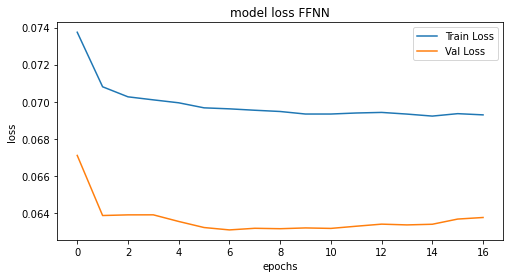

In [293]:
plt.figure(figsize=(8,4))
plt.plot(history_exp7.history['loss'], label='Train Loss')
plt.plot(history_exp7.history['val_loss'], label='Val Loss')
plt.title('model loss FFNN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

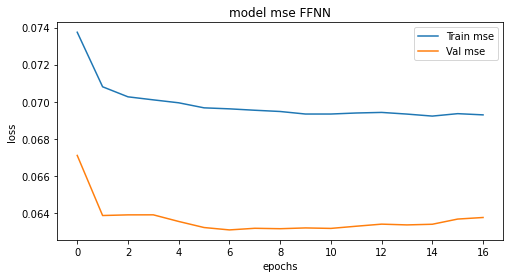

In [294]:
plt.figure(figsize=(8,4))
plt.plot(history_exp7.history['mse'], label='Train mse')
plt.plot(history_exp7.history['val_mse'], label='Val mse')
plt.title('model mse FFNN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

In [295]:
ypred7 = model_exp7.predict(X_test_7)

In [296]:
ypred7

array([[0.5124732 ],
       [0.49492767],
       [0.46696085],
       ...,
       [0.44408932],
       [0.37987894],
       [0.3656277 ]], dtype=float32)

In [297]:
y_test_7

2013-01-01 00:00:00    0.203481
2013-01-01 01:00:00    0.212396
2013-01-01 02:00:00    0.131881
2013-01-01 03:00:00    0.081364
2013-01-01 04:00:00    0.052498
                         ...   
2018-09-05 19:00:00    0.482949
2018-09-05 20:00:00    0.442762
2018-09-05 21:00:00    0.358143
2018-09-05 22:00:00    0.230366
2018-09-05 23:00:00    0.140371
Name: traffic_volume, Length: 5591, dtype: float64

In [298]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_7 = sqrt(mean_squared_error(ypred7, y_test_7))

In [299]:
print('Test RMSE: %.4f' % rmse_7)

Test RMSE: 0.2525


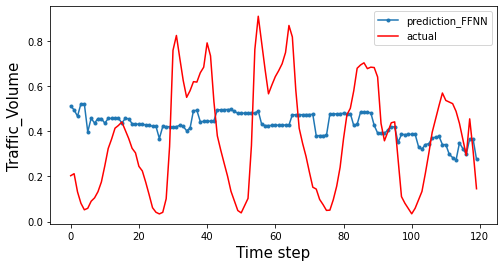

In [300]:
aa=[x for x in range(120)]
plt.figure(figsize=(8,4))
plt.plot(aa, ypred7[:120], marker='.', label="prediction_FFNN")
plt.plot(aa, y_test_7[:120], 'r', label="actual")
plt.ylabel('Traffic_Volume', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=10)
plt.show();

## Results and Conclusion: 

**1. The experiment being carried out is that Non holiday data is used for training the model and holiday data is used for testing. Holiday data has holiday data + 2 daya previous and later one date data. Weather desc label encoded data is also included for the model.** <br>

**2. From the graph, it is evident that the predictions are not good as compared to other models. Holiday data prediction using non holiday data is giving good predictions. The MSE and the validation loss are also on the higher side. So, this model is not able to predict the time series volume properly.**

## Non Holiday Split for Train and Validation 

In [301]:
X_8 = exp_7.iloc[:,:-1]

In [302]:
y_8 = exp_7['traffic_volume']

In [303]:
X_train_8, X_test_8, y_train_8, y_test_8 =  X_8[:26089], X_8[26089:] , y_8[:26089], y_8[26089:]

In [304]:
model_exp8 = Sequential()
model_exp8.add(Dense(12, input_dim=X_train_8.shape[1], kernel_initializer='normal',use_bias=True, activation='relu'))
model_exp8.add(Dense(12, activation='relu',use_bias=True))
model_exp8.add(Dense(12, activation='relu',use_bias=True))
model_exp8.add(Dense(12, activation='relu',use_bias=True))
model_exp8.add(Dropout(0.3))
model_exp8.add(Dense(1, activation='sigmoid'))
model_exp8.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 12)                108       
_________________________________________________________________
dense_33 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_34 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_35 (Dense)             (None, 12)                156       
_________________________________________________________________
dropout_8 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 13        
Total params: 589
Trainable params: 589
Non-trainable params: 0
________________________________________________________

In [305]:
model_exp8.compile(loss='mse',optimizer='adam',metrics=['mse'])

In [306]:
history_exp8 = model_exp8.fit(X_train_8, y_train_8, epochs=50, batch_size=100, validation_data=(X_test_8, y_test_8), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1,shuffle=False)

Epoch 1/50
261/261 [==============================] - 0s 1ms/step - loss: 0.0740 - mse: 0.0740 - val_loss: 0.0704 - val_mse: 0.0704
Epoch 2/50
261/261 [==============================] - 0s 1ms/step - loss: 0.0711 - mse: 0.0711 - val_loss: 0.0690 - val_mse: 0.0690
Epoch 3/50
261/261 [==============================] - 0s 1ms/step - loss: 0.0702 - mse: 0.0702 - val_loss: 0.0692 - val_mse: 0.0692
Epoch 4/50
261/261 [==============================] - 0s 1ms/step - loss: 0.0698 - mse: 0.0698 - val_loss: 0.0695 - val_mse: 0.0695
Epoch 5/50
261/261 [==============================] - 0s 1ms/step - loss: 0.0699 - mse: 0.0699 - val_loss: 0.0698 - val_mse: 0.0698
Epoch 6/50
261/261 [==============================] - 0s 2ms/step - loss: 0.0697 - mse: 0.0697 - val_loss: 0.0697 - val_mse: 0.0697
Epoch 7/50
261/261 [==============================] - 0s 1ms/step - loss: 0.0696 - mse: 0.0696 - val_loss: 0.0695 - val_mse: 0.0695
Epoch 8/50
261/261 [==============================] - 0s 2ms/step - loss: 0.

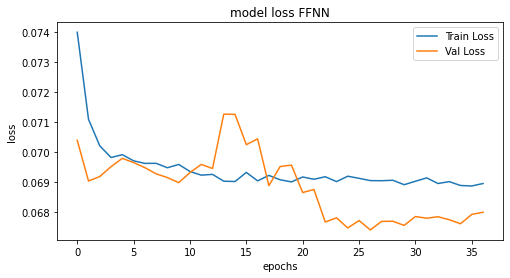

In [307]:
plt.figure(figsize=(8,4))
plt.plot(history_exp8.history['loss'], label='Train Loss')
plt.plot(history_exp8.history['val_loss'], label='Val Loss')
plt.title('model loss FFNN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

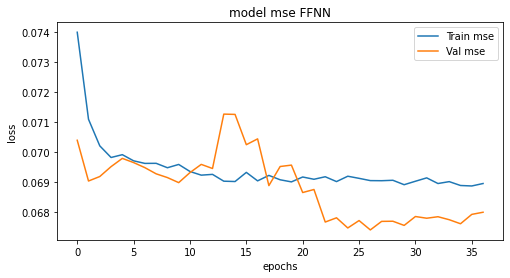

In [308]:
plt.figure(figsize=(8,4))
plt.plot(history_exp8.history['mse'], label='Train mse')
plt.plot(history_exp8.history['val_mse'], label='Val mse')
plt.title('model mse FFNN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

In [309]:
ypred8 = model_exp8.predict(X_test_8)

In [310]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_8 = sqrt(mean_squared_error(ypred8, y_test_8))

In [311]:
rmse_8

0.2607813135960242

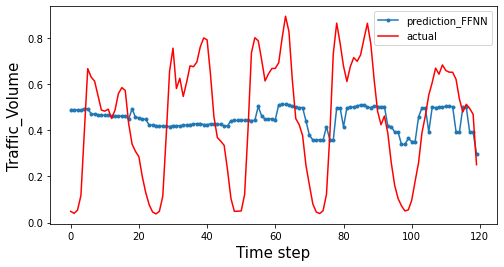

In [312]:
aa=[x for x in range(120)]
plt.figure(figsize=(8,4))
plt.plot(aa, ypred8[:120], marker='.', label="prediction_FFNN")
plt.plot(aa, y_test_8[:120], 'r', label="actual")
plt.ylabel('Traffic_Volume', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=10)
plt.show();

## Results and Conclusion: 

**1. The experiment being carried out is that Non Holiday is used for both training and testing with 70:30 ratio of split. This data has weather data in label encoded format as well.** <br>

**2. From the mse and the loss, it is seen that the model is doing fine but from the predictions we can it able to capture the trend very good. Downwards and upwards trend is easily captured. Non Holiday data has certain pattern which the model has learnt and is able to predict well for the non holiday data only. We can use this for predicting the non holiday days traffic volume**

## Holiday Data Only

In [313]:
X_9 = exp_8.iloc[:,:-1]

In [314]:
y_9 = exp_8['traffic_volume']

In [315]:
X_train_9, X_test_9, y_train_9, y_test_9 =  X_9[:3913], X_9[3913:] , y_9[:3913], y_9[3913:]

In [316]:
model_exp9 = Sequential()
model_exp9.add(Dense(12, input_dim=X_train_9.shape[1], kernel_initializer='normal',use_bias=True, activation='relu'))
model_exp9.add(Dense(12, activation='relu',use_bias=True))
model_exp9.add(Dense(12, activation='relu',use_bias=True))
model_exp9.add(Dropout(0.3))
model_exp9.add(Dense(1, activation='sigmoid'))
model_exp9.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 12)                108       
_________________________________________________________________
dense_38 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_39 (Dense)             (None, 12)                156       
_________________________________________________________________
dropout_9 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 13        
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________


In [317]:
model_exp9.compile(loss='mse',optimizer='adam',metrics=['mse'])

In [318]:
history_exp9 = model_exp9.fit(X_train_9, y_train_9, epochs=50, batch_size=100, validation_data=(X_test_9, y_test_9), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1,shuffle=False)

Epoch 1/50
40/40 [==============================] - 0s 4ms/step - loss: 0.0684 - mse: 0.0684 - val_loss: 0.0682 - val_mse: 0.0682
Epoch 2/50
40/40 [==============================] - 0s 1ms/step - loss: 0.0657 - mse: 0.0657 - val_loss: 0.0669 - val_mse: 0.0669
Epoch 3/50
40/40 [==============================] - 0s 1ms/step - loss: 0.0649 - mse: 0.0649 - val_loss: 0.0660 - val_mse: 0.0660
Epoch 4/50
40/40 [==============================] - 0s 1ms/step - loss: 0.0642 - mse: 0.0642 - val_loss: 0.0654 - val_mse: 0.0654
Epoch 5/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0636 - mse: 0.0636 - val_loss: 0.0649 - val_mse: 0.0649
Epoch 6/50
40/40 [==============================] - 0s 1ms/step - loss: 0.0630 - mse: 0.0630 - val_loss: 0.0646 - val_mse: 0.0646
Epoch 7/50
40/40 [==============================] - 0s 1ms/step - loss: 0.0628 - mse: 0.0628 - val_loss: 0.0645 - val_mse: 0.0645
Epoch 8/50
40/40 [==============================] - 0s 1ms/step - loss: 0.0619 - mse: 0.06

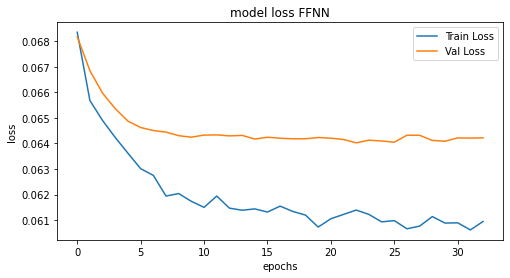

In [319]:
plt.figure(figsize=(8,4))
plt.plot(history_exp9.history['loss'], label='Train Loss')
plt.plot(history_exp9.history['val_loss'], label='Val Loss')
plt.title('model loss FFNN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

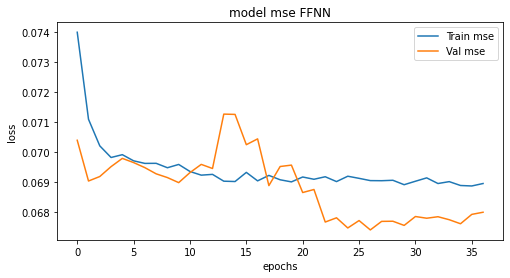

In [320]:
plt.figure(figsize=(8,4))
plt.plot(history_exp8.history['mse'], label='Train mse')
plt.plot(history_exp8.history['val_mse'], label='Val mse')
plt.title('model mse FFNN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

In [321]:
ypred9 = model_exp9.predict(X_test_9)

In [322]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_9 = sqrt(mean_squared_error(ypred9, y_test_9))

In [323]:
rmse_9

0.25342028695038216

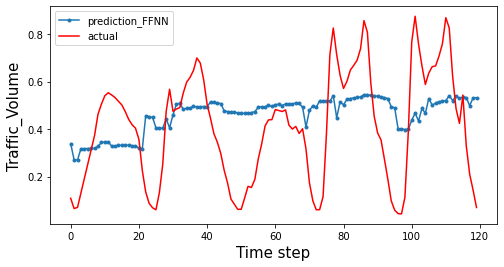

In [324]:
aa=[x for x in range(120)]
plt.figure(figsize=(8,4))
plt.plot(aa, ypred9[:120], marker='.', label="prediction_FFNN")
plt.plot(aa, y_test_9[:120], 'r', label="actual")
plt.ylabel('Traffic_Volume', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=10)
plt.show();

## Results and Conclusion: 

**1. The experiment being carried out is that only Holiday data is used for training and testing in the 70:30 ratio. Weather data is included.** <br>

**2. Based on the Loss and the MSE for the model build above, the model is doing very good predictions for holiday days. The Mse and loss are lower and the prediction upwards and downwards trend is captured for the holiday dates. This model is useful for predicting the holiday dates traffic volume as compared to a model with non holiday and holiday both included to predict holiday traffic.** <br>



## Old Data Used for Training (2013 - 1 year) and New Data after Time Series Break Used for Validation

In [325]:
exp_11 = abc9['2013-01-01 00:00:00':'2013-12-31 23:00:00']

In [326]:
exp_11.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,traffic_volume,Day_Week,Weekend,weather_desc,snow_bin,holi,weather_bin,date_time_new
date_time_new,,,,,,,,,,,,,
2013-01-01 00:00:00,1,-9.66,0.0,0.0,58.0,1439.0,1,0,1,0,1,1,2013-01-01 00:00:00
2013-01-01 01:00:00,1,-9.37,0.0,0.0,40.0,1502.0,1,0,1,0,1,1,2013-01-01 01:00:00
2013-01-01 02:00:00,1,-8.99,0.0,0.0,75.0,933.0,1,0,7,0,1,0,2013-01-01 02:00:00
2013-01-01 03:00:00,1,-9.20,0.0,0.0,90.0,576.0,1,0,1,0,1,1,2013-01-01 03:00:00
2013-01-01 04:00:00,1,-9.50,0.0,0.0,90.0,372.0,1,0,1,0,1,1,2013-01-01 04:00:00


In [327]:
exp_11.shape

(8760, 13)

In [328]:
exp_11 = exp_11.drop(columns=['snow_bin','holi','weather_bin','date_time_new'])

In [329]:
exp_11 = exp_11.reindex(columns=['holiday','temp','rain_1h','snow_1h','clouds_all','Day_Week','Weekend','weather_desc','traffic_volume'])

In [330]:
scaler = MinMaxScaler(feature_range=(0, 1))
expe_11 = scaler.fit_transform(exp_11)

exp_11 = pd.DataFrame(expe_11, columns=exp_11.columns, index=exp_11.index)

In [331]:
X_train_11 = exp_11.iloc[:,:-1]

In [332]:
y_train_11 = exp_11['traffic_volume']

In [333]:
exp_12 = abc9['2015-07-01 00:00:00':'2018-09-30 23:00:00']

In [334]:
exp_12 = exp_12.drop(columns=['snow_bin','holi','weather_bin','date_time_new'])

In [335]:
exp_12 = exp_12.reindex(columns=['holiday','temp','rain_1h','snow_1h','clouds_all','Day_Week','Weekend','weather_desc','traffic_volume'])

In [336]:
scaler = MinMaxScaler(feature_range=(0, 1))
expe_12 = scaler.fit_transform(exp_12)

exp_12 = pd.DataFrame(expe_12, columns=exp_12.columns, index=exp_12.index)

In [337]:
X_test_11 = exp_12.iloc[:,:-1]

In [338]:
y_test_11 = exp_12['traffic_volume']

In [339]:
model_exp10 = Sequential()
model_exp10.add(Dense(12, input_dim=X_train_11.shape[1], kernel_initializer='normal',use_bias=True, activation='relu'))
model_exp10.add(Dense(12, activation='relu',use_bias=True))
model_exp10.add(Dense(12, activation='relu',use_bias=True))
model_exp10.add(Dense(12, activation='relu',use_bias=True))
model_exp10.add(Dropout(0.3))
model_exp10.add(Dense(1, activation='sigmoid'))
model_exp10.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 12)                108       
_________________________________________________________________
dense_42 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_43 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_44 (Dense)             (None, 12)                156       
_________________________________________________________________
dropout_10 (Dropout)         (None, 12)                0         
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 13        
Total params: 589
Trainable params: 589
Non-trainable params: 0
________________________________________________________

In [340]:
model_exp10.compile(loss='mse',optimizer='adam',metrics=['mse'])

In [341]:
history_exp10 = model_exp10.fit(X_train_11, y_train_11, epochs=50, batch_size=100, validation_data=(X_test_11, y_test_11), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1,shuffle=False)

Epoch 1/50
88/88 [==============================] - 0s 5ms/step - loss: 0.0827 - mse: 0.0827 - val_loss: 0.0723 - val_mse: 0.0723
Epoch 2/50
88/88 [==============================] - 0s 3ms/step - loss: 0.0808 - mse: 0.0808 - val_loss: 0.0711 - val_mse: 0.0711
Epoch 3/50
88/88 [==============================] - 0s 3ms/step - loss: 0.0791 - mse: 0.0791 - val_loss: 0.0705 - val_mse: 0.0705
Epoch 4/50
88/88 [==============================] - 0s 3ms/step - loss: 0.0780 - mse: 0.0780 - val_loss: 0.0698 - val_mse: 0.0698
Epoch 5/50
88/88 [==============================] - 0s 3ms/step - loss: 0.0773 - mse: 0.0773 - val_loss: 0.0698 - val_mse: 0.0698
Epoch 6/50
88/88 [==============================] - 0s 5ms/step - loss: 0.0766 - mse: 0.0766 - val_loss: 0.0694 - val_mse: 0.0694
Epoch 7/50
88/88 [==============================] - 0s 3ms/step - loss: 0.0766 - mse: 0.0766 - val_loss: 0.0691 - val_mse: 0.0691
Epoch 8/50
88/88 [==============================] - 0s 3ms/step - loss: 0.0763 - mse: 0.07

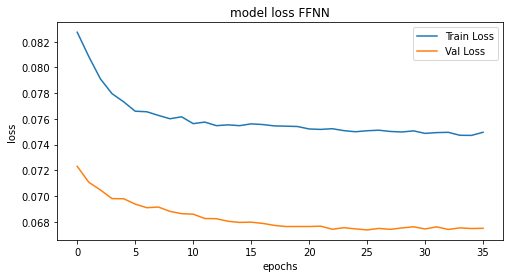

In [342]:
plt.figure(figsize=(8,4))
plt.plot(history_exp10.history['loss'], label='Train Loss')
plt.plot(history_exp10.history['val_loss'], label='Val Loss')
plt.title('model loss FFNN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

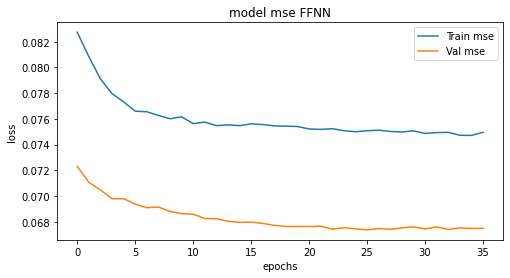

In [343]:
plt.figure(figsize=(8,4))
plt.plot(history_exp10.history['mse'], label='Train mse')
plt.plot(history_exp10.history['val_mse'], label='Val mse')
plt.title('model mse FFNN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

In [344]:
ypred11 = model_exp10.predict(X_test_11)

In [345]:
ypred11

array([[0.5241461 ],
       [0.5239875 ],
       [0.31017268],
       ...,
       [0.25889146],
       [0.35308772],
       [0.3531735 ]], dtype=float32)

In [346]:
y_test_11

date_time_new
2015-07-01 01:00:00    0.060989
2015-07-01 02:00:00    0.047665
2015-07-01 03:00:00    0.048901
2015-07-01 04:00:00    0.128571
2015-07-01 05:00:00    0.396429
                         ...   
2018-09-30 19:00:00    0.486676
2018-09-30 20:00:00    0.382005
2018-09-30 21:00:00    0.296566
2018-09-30 22:00:00    0.199176
2018-09-30 23:00:00    0.131044
Name: traffic_volume, Length: 28511, dtype: float64

In [347]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_11 = sqrt(mean_squared_error(ypred11, y_test_11))

In [348]:
rmse_11

0.259775673740031

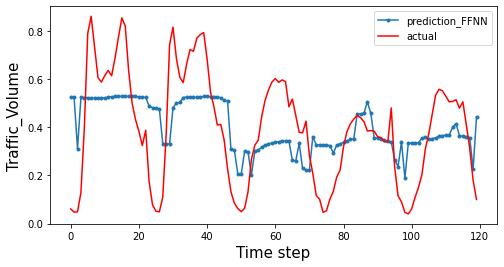

In [349]:
aa=[x for x in range(120)]
plt.figure(figsize=(8,4))
plt.plot(aa, ypred11[:120], marker='.', label="prediction_FFNN")
plt.plot(aa, y_test_11[:120], 'r', label="actual")
plt.ylabel('Traffic_Volume', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=10)
plt.show();

## Results and Conclusion: 

**1. The experiment being carried out is that Old data of 1 Year for 2013 is used for training whereas for predictions we use new data after the time series break is ended. This includes weather and holiday data as well.** <br>

**2. Based on the Loss and the MSE for the model build above,the model is not doing good predictions as only 1 year of data is provided for the training and we are trying to predict the data after break in the TIme Series. This model is still capturing trends but not as well as other models would do. We would need to provide more training data as well as have continuous data for prediction and train and no gap in between** <br>



## Univariate Time Series Forecasting

**For Univariate Time Series Forecasting, Only Traffic Volume data is used along with time. No other variables come into picture.** <br>

**We have done 2 major experiments of changing the lag from 1 hour to 12 hours for the prediction** <br>

**The Final predicted output is inverse scaled to the original scale to plot the prediction vs actual to see the model performance.** <br>

**RNN, LSTM and GRU are the models built for the Univariate Time Series Forecasting.**

## Data Pre-processing for the RNN models

In [350]:
abc9.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,traffic_volume,Day_Week,Weekend,weather_desc,snow_bin,holi,weather_bin,date_time_new
date_time_new,,,,,,,,,,,,,
2013-01-01 00:00:00,1,-9.66,0.0,0.0,58.0,1439.0,1,0,1,0,1,1,2013-01-01 00:00:00
2013-01-01 01:00:00,1,-9.37,0.0,0.0,40.0,1502.0,1,0,1,0,1,1,2013-01-01 01:00:00
2013-01-01 02:00:00,1,-8.99,0.0,0.0,75.0,933.0,1,0,7,0,1,0,2013-01-01 02:00:00
2013-01-01 03:00:00,1,-9.20,0.0,0.0,90.0,576.0,1,0,1,0,1,1,2013-01-01 03:00:00
2013-01-01 04:00:00,1,-9.50,0.0,0.0,90.0,372.0,1,0,1,0,1,1,2013-01-01 04:00:00


In [351]:
abc9.shape

(37271, 13)

In [353]:
df_univ = abc9.traffic_volume.values

In [354]:
len(df_univ)

37271

In [355]:
df_univ = df_univ.astype('float32')

In [356]:
# Reshape the value to -1,1

df_univ = np.reshape(df_univ, (-1, 1))

In [357]:
# Scale the data 

scaler = MinMaxScaler(feature_range=(0, 1))
data_univ = scaler.fit_transform(df_univ)

In [358]:
# Split the data into train, validationa and test

train, val, test = data_univ[0:26090,:], data_univ[26090:33544,:], data_univ[33544:,:]

In [359]:
# Function to create 1 period lag

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [360]:


look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_val, y_val = create_dataset(val, look_back)
X_test, y_test = create_dataset(test, look_back)

In [361]:
X_train.shape

(26088, 1)

In [362]:
# Reshaping the train, valid and test data for RNN models with 1 period lag

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_val = np.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0],1,X_test.shape[1]))

In [363]:
# Function to create 12 hour lag

def create_dataset1(dataset, look_back):
    X, Y = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [364]:
# Transform the data to 12 hour lag

look_back = 12
X_train_lags, y_train_lags = create_dataset1(train, look_back)
X_val_lags, y_val_lags = create_dataset1(val, look_back)
X_test_lags, y_test_lags = create_dataset1(test, look_back)


In [365]:
X_train_lags.shape

(26078, 12)

In [366]:
# Reshape the data to 3D as required by the RNN models for 12 hour lag 

X_train_lags = np.reshape(X_train_lags, (X_train_lags.shape[0], X_train_lags.shape[1], 1 ))
X_val_lags = np.reshape(X_val_lags, (X_val_lags.shape[0], X_val_lags.shape[1], 1))
X_test_lags = np.reshape(X_test_lags, (X_test_lags.shape[0],X_test_lags.shape[1],1))

## Simple RNN for Univariate Time Series Forecasting

In [367]:
# Build the Simple RNN Model

model_uni_rnn = Sequential()
model_uni_rnn.add(SimpleRNN(10, input_shape=(X_train.shape[1], X_train.shape[2])))
model_uni_rnn.add(Dropout(0.2))
model_uni_rnn.add(Dense(1))
model_uni_rnn.compile(loss='mean_squared_error', optimizer='adam',metrics=['mse'])
model_uni_rnn.summary()
#model_uni_lstm.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 10)                120       
_________________________________________________________________
dropout_11 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [368]:
# Fit train data to the model

history_1_rnn = model_uni_rnn.fit(X_train, y_train, epochs=50, batch_size=100, validation_data=(X_val, y_val), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

Epoch 1/50
261/261 [==============================] - 1s 2ms/step - loss: 0.4143 - mse: 0.4143 - val_loss: 0.1035 - val_mse: 0.1035
Epoch 2/50
261/261 [==============================] - 0s 1ms/step - loss: 0.1053 - mse: 0.1053 - val_loss: 0.0434 - val_mse: 0.0434
Epoch 3/50
261/261 [==============================] - 0s 1ms/step - loss: 0.0555 - mse: 0.0555 - val_loss: 0.0199 - val_mse: 0.0199
Epoch 4/50
261/261 [==============================] - 0s 1ms/step - loss: 0.0366 - mse: 0.0366 - val_loss: 0.0139 - val_mse: 0.0139
Epoch 5/50
261/261 [==============================] - 0s 2ms/step - loss: 0.0288 - mse: 0.0288 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 6/50
261/261 [==============================] - 0s 1ms/step - loss: 0.0253 - mse: 0.0253 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 7/50
261/261 [==============================] - 0s 1ms/step - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 8/50
261/261 [==============================] - 0s 1ms/step - loss: 0.

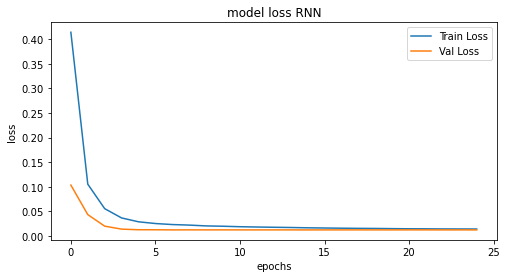

In [369]:
# Plot the Loss for SImple RNN for traina and test

plt.figure(figsize=(8,4))
plt.plot(history_1_rnn.history['loss'], label='Train Loss')
plt.plot(history_1_rnn.history['val_loss'], label='Val Loss')
plt.title('model loss RNN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

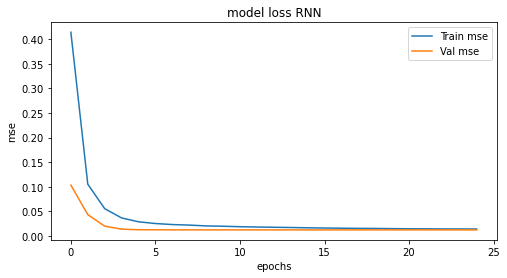

In [370]:
# Plot the MSE for SImple RNN for train and test

plt.figure(figsize=(8,4))
plt.plot(history_1_rnn.history['mse'], label='Train mse')
plt.plot(history_1_rnn.history['val_mse'], label='Val mse')
plt.title('model loss RNN')
plt.ylabel('mse')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

In [371]:
# Create prediction from the model

train_predict_rnn = model_uni_rnn.predict(X_train)
val_predict_rnn = model_uni_rnn.predict(X_val)
test_predict_rnn = model_uni_rnn.predict(X_test)
# invert predictions
train_predict_rnn = scaler.inverse_transform(train_predict_rnn)
y_train = scaler.inverse_transform([y_train])
val_predict_rnn = scaler.inverse_transform(val_predict_rnn)
y_val = scaler.inverse_transform([y_val])
test_predict_rnn = scaler.inverse_transform(test_predict_rnn)
y_test = scaler.inverse_transform([y_test])

In [372]:
# RMSE for Simple RNN model

rmse_rnn = sqrt(mean_squared_error(y_test[0], test_predict_rnn[:,0]))
print('Test RMSE: %.3f' % rmse_rnn)

Test RMSE: 795.936


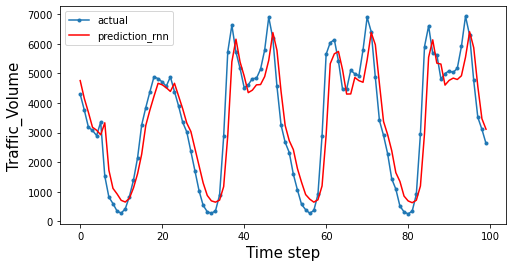

In [373]:
aa=[x for x in range(100)]
plt.figure(figsize=(8,4))
plt.plot(aa, y_test[0][:100], marker='.', label="actual")
plt.plot(aa, test_predict_rnn[:,0][:100], 'r', label="prediction_rnn")
plt.ylabel('Traffic_Volume', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=10)
plt.show();

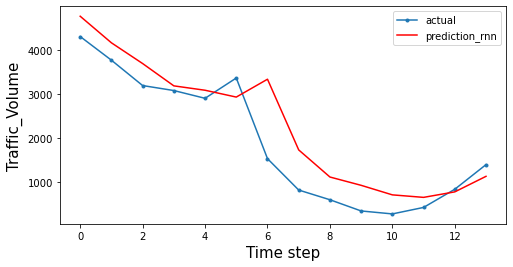

In [374]:
aa=[x for x in range(14)]
plt.figure(figsize=(8,4))
plt.plot(aa, y_test[0][:14], marker='.', label="actual")
plt.plot(aa, test_predict_rnn[:,0][:14], 'r', label="prediction_rnn")
plt.ylabel('Traffic_Volume', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=10)
plt.show();

## Result and Conclusion:

**For the Simple RNN, we can see that validation loss and mse have reduced drastically as compared to FFNN. The models are performing very good. They are able to able the patterns the data even after there is a breakage in the time series. Computationally they are efficient and they do the prediction as close to the original. We can see that the graph is just the shifted version of the original values and is like the replica of the original forecast as it captures the Time Series Data Perfectly.**

## Simple RNN Lagged by 12 hours

In [375]:
# Transform the data to 12 hour lag

look_back = 12
X_train_lags, y_train_lags = create_dataset1(train, look_back)
X_val_lags, y_val_lags = create_dataset1(val, look_back)
X_test_lags, y_test_lags = create_dataset1(test, look_back)


In [376]:
X_train_lags.shape

(26078, 12)

In [377]:
# Reshape the data to 3D as required by the RNN models for 12 hour lag 

X_train_lags = np.reshape(X_train_lags, (X_train_lags.shape[0], X_train_lags.shape[1], 1 ))
X_val_lags = np.reshape(X_val_lags, (X_val_lags.shape[0], X_val_lags.shape[1], 1))
X_test_lags = np.reshape(X_test_lags, (X_test_lags.shape[0],X_test_lags.shape[1],1))

In [378]:
model_uni_rnn1 = Sequential()
model_uni_rnn1.add(SimpleRNN(10, return_sequences=True,input_shape=(X_train_lags.shape[1], X_train_lags.shape[2])))
model_uni_rnn1.add(SimpleRNN(10))
model_uni_rnn1.add(Dropout(0.2))
model_uni_rnn1.add(Dense(1))
model_uni_rnn1.compile(loss='mean_squared_error', optimizer='adam',metrics=['mse'])
model_uni_rnn1.summary()
#model_uni_lstm.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 12, 10)            120       
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 10)                210       
_________________________________________________________________
dropout_12 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 11        
Total params: 341
Trainable params: 341
Non-trainable params: 0
_________________________________________________________________


In [379]:
history_1_rnn1 = model_uni_rnn1.fit(X_train_lags, y_train_lags, epochs=50, batch_size=100, validation_data=(X_val_lags, y_val_lags), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

Epoch 1/50
261/261 [==============================] - 2s 6ms/step - loss: 0.0732 - mse: 0.0732 - val_loss: 0.0223 - val_mse: 0.0223
Epoch 2/50
261/261 [==============================] - 1s 4ms/step - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 3/50
261/261 [==============================] - 1s 3ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 4/50
261/261 [==============================] - 1s 4ms/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 5/50
261/261 [==============================] - 1s 4ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 6/50
261/261 [==============================] - 1s 3ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 7/50
261/261 [==============================] - 1s 3ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 8/50
261/261 [==============================] - 1s 4ms/step - loss: 0.

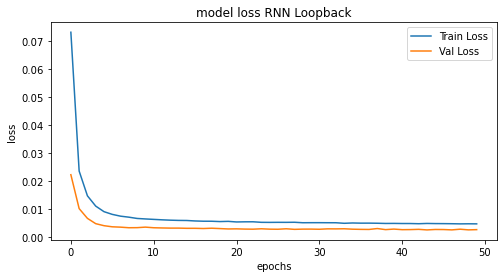

In [380]:
plt.figure(figsize=(8,4))
plt.plot(history_1_rnn1.history['loss'], label='Train Loss')
plt.plot(history_1_rnn1.history['val_loss'], label='Val Loss')
plt.title('model loss RNN Loopback')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

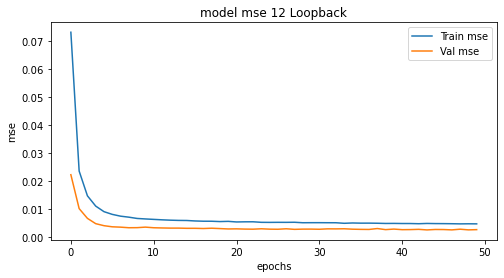

In [381]:
plt.figure(figsize=(8,4))
plt.plot(history_1_rnn1.history['mse'], label='Train mse')
plt.plot(history_1_rnn1.history['val_mse'], label='Val mse')
plt.title('model mse 12 Loopback')
plt.ylabel('mse')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

In [382]:
train_predict_rnn1 = model_uni_rnn1.predict(X_train_lags)
val_predict_rnn1 = model_uni_rnn1.predict(X_val_lags)
test_predict_rnn1 = model_uni_rnn1.predict(X_test_lags)
# invert predictions
train_predict_rnn1 = scaler.inverse_transform(train_predict_rnn1)
y_train_lags = scaler.inverse_transform([y_train_lags])
val_predict_rnn1 = scaler.inverse_transform(val_predict_rnn1)
y_val_lags = scaler.inverse_transform([y_val_lags])
test_predict_rnn1 = scaler.inverse_transform(test_predict_rnn1)
y_test_lags = scaler.inverse_transform([y_test_lags])

In [383]:
rmse_rnn1 = sqrt(mean_squared_error(y_test_lags[0], test_predict_rnn1[:,0]))
print('Test RMSE: %.3f' % rmse_rnn1)

Test RMSE: 308.019


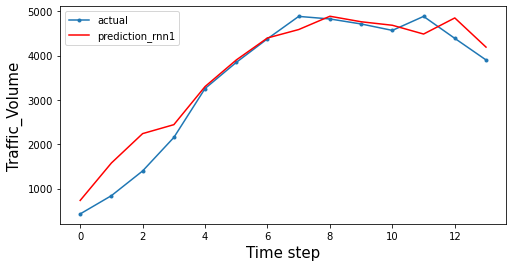

In [384]:
aa=[x for x in range(14)]
plt.figure(figsize=(8,4))
plt.plot(aa, y_test_lags[0][:14], marker='.', label="actual")
plt.plot(aa, test_predict_rnn1[:,0][:14], 'r', label="prediction_rnn1")
plt.ylabel('Traffic_Volume', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=10)
plt.show();

## Results and Conclusion:

**The SimpleRNN with Lag of 12 hours performs better than Simple 1 Period Lag RNN. We can see that the prediction is replica shifted by the period and the loss and mse have reduced significantly to 0.003 instead of 0.01 something earlier. Haing higher lag makes the model predict better with the RMSE being reduced to half the original one.**

## LSTM Univariate Time Series Forecasting

In [385]:


look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_val, y_val = create_dataset(val, look_back)
X_test, y_test = create_dataset(test, look_back)

In [386]:
# Reshaping the train, valid and test data for RNN models with 1 period lag

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_val = np.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0],1,X_test.shape[1]))

In [387]:
model_uni_lstm = Sequential()
model_uni_lstm.add(LSTM(10, input_shape=(X_train.shape[1], X_train.shape[2])))
model_uni_lstm.add(Dropout(0.2))
model_uni_lstm.add(Dense(1))
model_uni_lstm.compile(loss='mean_squared_error', optimizer='adam',metrics=['mse'])
model_uni_lstm.summary()
#model_uni_lstm.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10)                480       
_________________________________________________________________
dropout_13 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [388]:
history_1_lstm = model_uni_lstm.fit(X_train, y_train, epochs=50, batch_size=100, validation_data=(X_val, y_val), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

Epoch 1/50
261/261 [==============================] - 1s 3ms/step - loss: 0.1351 - mse: 0.1351 - val_loss: 0.0462 - val_mse: 0.0462
Epoch 2/50
261/261 [==============================] - 1s 3ms/step - loss: 0.0401 - mse: 0.0401 - val_loss: 0.0277 - val_mse: 0.0277
Epoch 3/50
261/261 [==============================] - 1s 3ms/step - loss: 0.0253 - mse: 0.0253 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 4/50
261/261 [==============================] - 0s 2ms/step - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0129 - val_mse: 0.0129
Epoch 5/50
261/261 [==============================] - 0s 2ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0127 - val_mse: 0.0127
Epoch 6/50
261/261 [==============================] - 0s 2ms/step - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0127 - val_mse: 0.0127
Epoch 7/50
261/261 [==============================] - 0s 2ms/step - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 8/50
261/261 [==============================] - 1s 2ms/step - loss: 0.

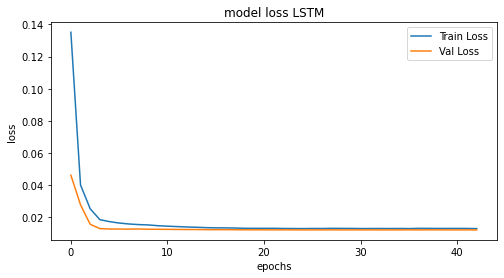

In [389]:
plt.figure(figsize=(8,4))
plt.plot(history_1_lstm.history['loss'], label='Train Loss')
plt.plot(history_1_lstm.history['val_loss'], label='Val Loss')
plt.title('model loss LSTM')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

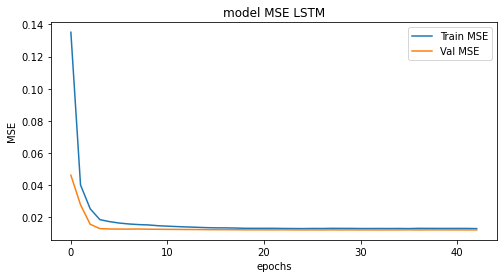

In [390]:
plt.figure(figsize=(8,4))
plt.plot(history_1_lstm.history['mse'], label='Train MSE')
plt.plot(history_1_lstm.history['val_mse'], label='Val MSE')
plt.title('model MSE LSTM')
plt.ylabel('MSE')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

In [391]:
train_predict_lstm = model_uni_lstm.predict(X_train)
val_predict_lstm = model_uni_lstm.predict(X_val)
test_predict_lstm = model_uni_lstm.predict(X_test)
# invert predictions
train_predict_lstm = scaler.inverse_transform(train_predict_lstm)
y_train = scaler.inverse_transform([y_train])
val_predict_lstm = scaler.inverse_transform(val_predict_lstm)
y_val = scaler.inverse_transform([y_val])
test_predict_lstm = scaler.inverse_transform(test_predict_lstm)
y_test = scaler.inverse_transform([y_test])

In [392]:
rmse_lstm = sqrt(mean_squared_error(y_test[0], test_predict_lstm[:,0]))
print('Test RMSE: %.3f' % rmse_lstm)

Test RMSE: 789.944


In [393]:
y_test.shape

(1, 3725)

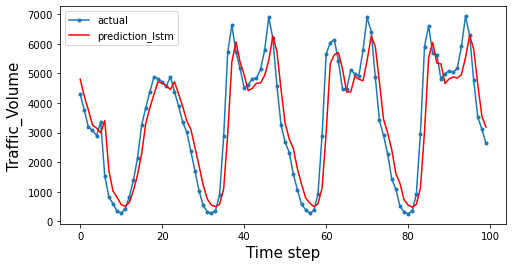

In [395]:
aa=[x for x in range(100)]
plt.figure(figsize=(8,4))
plt.plot(aa, y_test[0][:100], marker='.', label="actual")
plt.plot(aa, test_predict_lstm[:,0][:100], 'r', label="prediction_lstm")
plt.ylabel('Traffic_Volume', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=10)
plt.show();

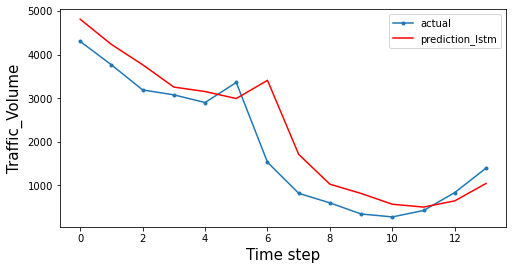

In [396]:
aa=[x for x in range(14)]
plt.figure(figsize=(8,4))
plt.plot(aa, y_test[0][:14], marker='.', label="actual")
plt.plot(aa, test_predict_lstm[:,0][:14], 'r', label="prediction_lstm")
plt.ylabel('Traffic_Volume', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=10)
plt.show();

## Result and Conclusion:

**For the LSTM, we can see that validation loss and mse have reduced drastically as compared to FFNN and better than SimpleRNN. The models are performing very good. They are able to able the patterns the data even after there is a breakage in the time series. Computationally they are efficient than SimpleRNN having fewer gates and they do the prediction as close to the original. Graph is like shifted version of the original. Also, having the lower computational power needs by LSTM still gives better RMSE than Simple RNN. LSTM's do the great job for the prediction of the Time Series Data. The graph for MSE and Loss have a sharp bend as compared to that of Simple RNN meaning that they reduce very rapidly.**

## LSTM Univariate Time Series Forecasting with 12 hours Lag

In [397]:
look_back = 12
X_train_lags, y_train_lags = create_dataset1(train, look_back)
X_val_lags, y_val_lags = create_dataset1(val, look_back)
X_test_lags, y_test_lags = create_dataset1(test, look_back)


In [398]:
X_train_lags = np.reshape(X_train_lags, (X_train_lags.shape[0], X_train_lags.shape[1], 1 ))
X_val_lags = np.reshape(X_val_lags, (X_val_lags.shape[0], X_val_lags.shape[1], 1))
X_test_lags = np.reshape(X_test_lags, (X_test_lags.shape[0],X_test_lags.shape[1],1))

In [399]:
model_uni_lstm1 = Sequential()
model_uni_lstm1.add(LSTM(10, input_shape=(X_train_lags.shape[1], X_train_lags.shape[2])))
model_uni_lstm1.add(Dropout(0.2))
model_uni_lstm1.add(Dense(1))
model_uni_lstm1.compile(loss='mean_squared_error', optimizer='adam',metrics=['mse'])
model_uni_lstm1.summary()
#model_uni_lstm.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10)                480       
_________________________________________________________________
dropout_14 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [400]:
history_1_lstm1 = model_uni_lstm1.fit(X_train_lags, y_train_lags, epochs=50, batch_size=100, validation_data=(X_val_lags, y_val_lags), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

Epoch 1/50
261/261 [==============================] - 2s 8ms/step - loss: 0.0826 - mse: 0.0826 - val_loss: 0.0332 - val_mse: 0.0332
Epoch 2/50
261/261 [==============================] - 2s 6ms/step - loss: 0.0293 - mse: 0.0293 - val_loss: 0.0205 - val_mse: 0.0205
Epoch 3/50
261/261 [==============================] - 2s 6ms/step - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 4/50
261/261 [==============================] - 2s 7ms/step - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0135 - val_mse: 0.0135
Epoch 5/50
261/261 [==============================] - 2s 6ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 6/50
261/261 [==============================] - 2s 7ms/step - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 7/50
261/261 [==============================] - 2s 7ms/step - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 8/50
261/261 [==============================] - 2s 7ms/step - loss: 0.

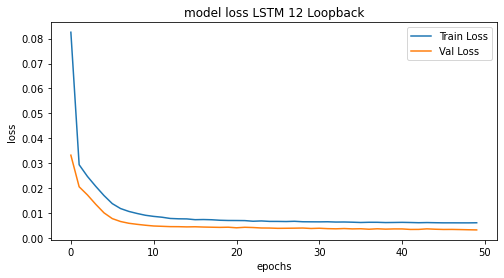

In [401]:
plt.figure(figsize=(8,4))
plt.plot(history_1_lstm1.history['loss'], label='Train Loss')
plt.plot(history_1_lstm1.history['val_loss'], label='Val Loss')
plt.title('model loss LSTM 12 Loopback')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

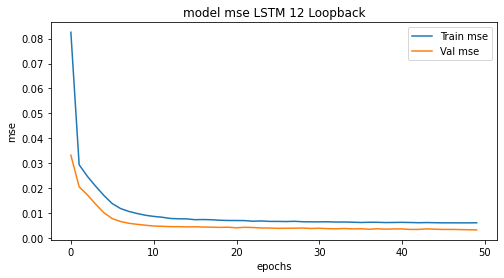

In [402]:
plt.figure(figsize=(8,4))
plt.plot(history_1_lstm1.history['mse'], label='Train mse')
plt.plot(history_1_lstm1.history['val_mse'], label='Val mse')
plt.title('model mse LSTM 12 Loopback')
plt.ylabel('mse')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

In [403]:
train_predict_lstm1 = model_uni_lstm1.predict(X_train_lags)
val_predict_lstm1 = model_uni_lstm1.predict(X_val_lags)
test_predict_lstm1 = model_uni_lstm1.predict(X_test_lags)
# invert predictions
train_predict_lstm1 = scaler.inverse_transform(train_predict_lstm1)
y_train_lags = scaler.inverse_transform([y_train_lags])
val_predict_lstm1 = scaler.inverse_transform(val_predict_lstm1)
y_val_lags = scaler.inverse_transform([y_val_lags])
test_predict_lstm1 = scaler.inverse_transform(test_predict_lstm1)
y_test_lags = scaler.inverse_transform([y_test_lags])

In [404]:
rmse_lstm1 = sqrt(mean_squared_error(y_test_lags[0], test_predict_lstm1[:,0]))
print('Test RMSE: %.3f' % rmse_lstm1)

Test RMSE: 359.326


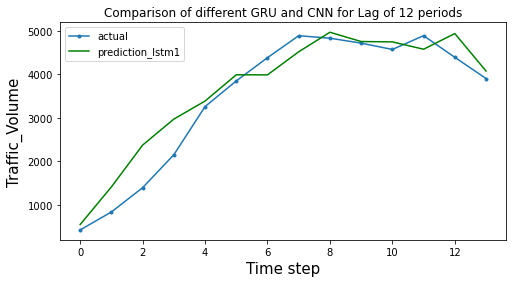

In [406]:
aa=[x for x in range(14)]
plt.figure(figsize=(8,4))
plt.plot(aa, y_test_lags[0][:14], marker='.', label="actual")
plt.plot(aa, test_predict_lstm1[:,0][:14], 'g', label="prediction_lstm1")
plt.ylabel('Traffic_Volume', size=15)
plt.xlabel('Time step', size=15)
plt.title('Comparison of different GRU and CNN for Lag of 12 periods')
plt.legend(fontsize=10)
plt.show();

## Results and Conclusion:
**The LSTM with Lag of 12 hours performs better than Simple 1 Period Lag LSTM. We can see that the prediction is replica shifted by the period and the loss and mse have reduced significantly to 0.0030 below that of SimpleRNN. Having higher lag makes the model predict better with the RMSE being reduced to half the original one. LSTM with Lag of 12 hours is doing the best job as it is taking into consideration not just 1 past lag but 12 lags to avoid any sudden spikes which may lead to model performance degradation.**

## GRU Univariate Time Series Forecasting

In [407]:


look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_val, y_val = create_dataset(val, look_back)
X_test, y_test = create_dataset(test, look_back)

In [408]:
# Reshaping the train, valid and test data for RNN models with 1 period lag

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_val = np.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0],1,X_test.shape[1]))

In [409]:
model_uni_gru = Sequential()
model_uni_gru.add(GRU(10, input_shape=(X_train.shape[1], X_train.shape[2])))
model_uni_gru.add(Dropout(0.2))
model_uni_gru.add(Dense(1))
model_uni_gru.compile(loss='mean_squared_error', optimizer='adam',metrics=['mse'])
model_uni_gru.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 10)                360       
_________________________________________________________________
dropout_15 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 11        
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


In [410]:
history_1_gru = model_uni_gru.fit(X_train, y_train, epochs=50, batch_size=100, validation_data=(X_val, y_val), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

Epoch 1/50
261/261 [==============================] - 1s 3ms/step - loss: 0.1109 - mse: 0.1109 - val_loss: 0.0409 - val_mse: 0.0409
Epoch 2/50
261/261 [==============================] - 0s 2ms/step - loss: 0.0361 - mse: 0.0361 - val_loss: 0.0213 - val_mse: 0.0213
Epoch 3/50
261/261 [==============================] - 0s 1ms/step - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0135 - val_mse: 0.0135
Epoch 4/50
261/261 [==============================] - 0s 1ms/step - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 5/50
261/261 [==============================] - 0s 2ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 6/50
261/261 [==============================] - 0s 2ms/step - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 7/50
261/261 [==============================] - 0s 2ms/step - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 8/50
261/261 [==============================] - 0s 2ms/step - loss: 0.

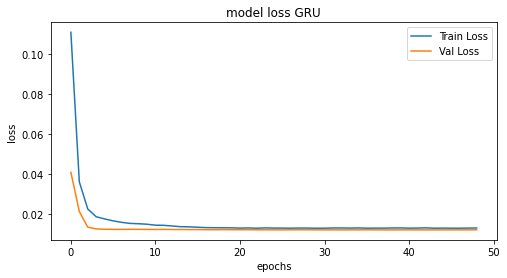

In [411]:
plt.figure(figsize=(8,4))
plt.plot(history_1_gru.history['loss'], label='Train Loss')
plt.plot(history_1_gru.history['val_loss'], label='Val Loss')
plt.title('model loss GRU')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

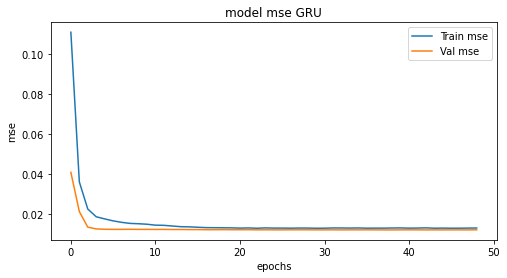

In [412]:
plt.figure(figsize=(8,4))
plt.plot(history_1_gru.history['mse'], label='Train mse')
plt.plot(history_1_gru.history['val_mse'], label='Val mse')
plt.title('model mse GRU')
plt.ylabel('mse')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

In [413]:
train_predict_gru = model_uni_gru.predict(X_train)
val_predict_gru = model_uni_gru.predict(X_val)
test_predict_gru = model_uni_gru.predict(X_test)
# invert predictions
train_predict_gru = scaler.inverse_transform(train_predict_gru)
y_train = scaler.inverse_transform([y_train])
val_predict_gru = scaler.inverse_transform(val_predict_gru)
y_val = scaler.inverse_transform([y_val])
test_predict_gru = scaler.inverse_transform(test_predict_gru)
y_test = scaler.inverse_transform([y_test])

In [414]:
rmse_gru = sqrt(mean_squared_error(y_test[0], test_predict_gru[:,0]))
print('Test RMSE: %.3f' % rmse_gru)

Test RMSE: 791.507


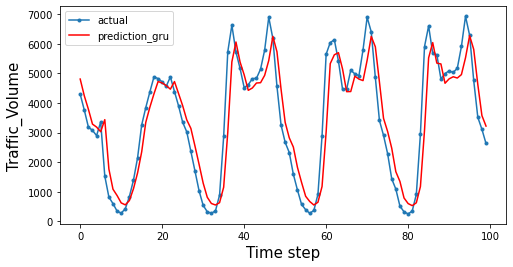

In [415]:
aa=[x for x in range(100)]
plt.figure(figsize=(8,4))
plt.plot(aa, y_test[0][:100], marker='.', label="actual")
plt.plot(aa, test_predict_gru[:,0][:100], 'r', label="prediction_gru")
plt.ylabel('Traffic_Volume', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=10)
plt.show();

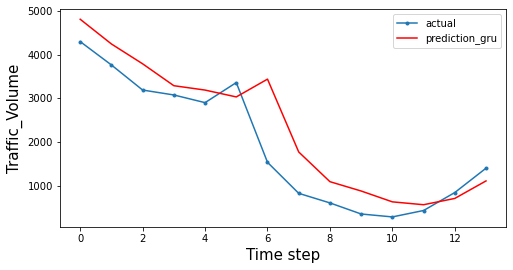

In [416]:
aa=[x for x in range(14)]
plt.figure(figsize=(8,4))
plt.plot(aa, y_test[0][:14], marker='.', label="actual")
plt.plot(aa, test_predict_gru[:,0][:14], 'r', label="prediction_gru")
plt.ylabel('Traffic_Volume', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=10)
plt.show();

## Results and Conclusion:
**For the GRU, there are only 2 gates as compared to LSTM with 3 gates. This makes GRU more efficient and computationally efficient. Loss and MSE for validation start lower than LSTM's and go lower than them very rapidly. The prediction is slighly better than LSTm and the RMSE is also better making it the best Model.**

## GRU Univariate Changing Dropout and GRU layers with number of GRU nodes

In [417]:


look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_val, y_val = create_dataset(val, look_back)
X_test, y_test = create_dataset(test, look_back)

In [418]:
# Reshaping the train, valid and test data for RNN models with 1 period lag

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_val = np.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0],1,X_test.shape[1]))

In [419]:
model_uni_gru1 = Sequential()
model_uni_gru1.add(GRU(20,return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_uni_gru1.add(GRU(10, return_sequences=True))
model_uni_gru1.add(GRU(10,))
model_uni_gru1.add(Dropout(0.2))
model_uni_gru1.add(Dense(1))
model_uni_gru1.compile(loss='mean_squared_error', optimizer='adam',metrics=['mse'])

In [420]:
model_uni_gru1.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 1, 20)             1320      
_________________________________________________________________
gru_2 (GRU)                  (None, 1, 10)             930       
_________________________________________________________________
gru_3 (GRU)                  (None, 10)                630       
_________________________________________________________________
dropout_16 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 11        
Total params: 2,891
Trainable params: 2,891
Non-trainable params: 0
_________________________________________________________________


In [421]:
history_1_gru1 = model_uni_gru1.fit(X_train, y_train, epochs=50, batch_size=100, validation_data=(X_val, y_val), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

Epoch 1/50
261/261 [==============================] - 2s 9ms/step - loss: 0.0653 - mse: 0.0653 - val_loss: 0.0131 - val_mse: 0.0131
Epoch 2/50
261/261 [==============================] - 1s 3ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 3/50
261/261 [==============================] - 1s 3ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 4/50
261/261 [==============================] - 1s 3ms/step - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 5/50
261/261 [==============================] - 1s 3ms/step - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 6/50
261/261 [==============================] - 1s 3ms/step - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 7/50
261/261 [==============================] - 1s 3ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 8/50
261/261 [==============================] - 1s 5ms/step - loss: 0.

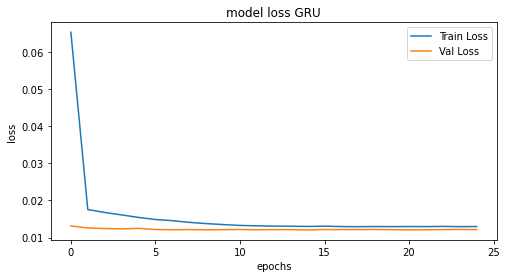

In [422]:
plt.figure(figsize=(8,4))
plt.plot(history_1_gru1.history['loss'], label='Train Loss')
plt.plot(history_1_gru1.history['val_loss'], label='Val Loss')
plt.title('model loss GRU')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

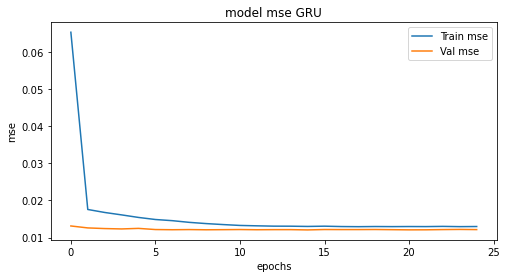

In [423]:
plt.figure(figsize=(8,4))
plt.plot(history_1_gru1.history['mse'], label='Train mse')
plt.plot(history_1_gru1.history['val_mse'], label='Val mse')
plt.title('model mse GRU')
plt.ylabel('mse')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

In [424]:
train_predict_gru1 = model_uni_gru1.predict(X_train)
val_predict_gru1 = model_uni_gru1.predict(X_val)
test_predict_gru1 = model_uni_gru1.predict(X_test)
# invert predictions
train_predict_gru1 = scaler.inverse_transform(train_predict_gru1)
y_train = scaler.inverse_transform([y_train])
val_predict_gru1 = scaler.inverse_transform(val_predict_gru1)
y_val = scaler.inverse_transform([y_val])
test_predict_gru1 = scaler.inverse_transform(test_predict_gru1)
y_test = scaler.inverse_transform([y_test])

In [425]:
rmse_gru1 = sqrt(mean_squared_error(y_test[0], test_predict_gru1[:,0]))
print('Test RMSE: %.3f' % rmse_gru1)

Test RMSE: 790.641


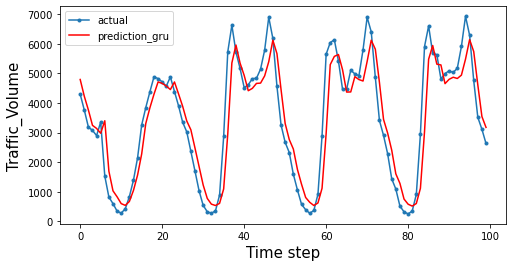

In [426]:
aa=[x for x in range(100)]
plt.figure(figsize=(8,4))
plt.plot(aa, y_test[0][:100], marker='.', label="actual")
plt.plot(aa, test_predict_gru1[:,0][:100], 'r', label="prediction_gru")
plt.ylabel('Traffic_Volume', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=10)
plt.show();

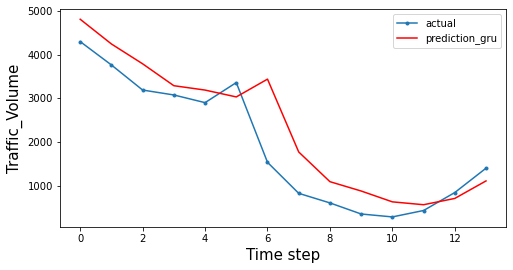

In [427]:
aa=[x for x in range(14)]
plt.figure(figsize=(8,4))
plt.plot(aa, y_test[0][:14], marker='.', label="actual")
plt.plot(aa, test_predict_gru[:,0][:14], 'r', label="prediction_gru")
plt.ylabel('Traffic_Volume', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=10)
plt.show();

## Result and Conclusion:

**Increasing the GRU Hidden Layers and the GRU units have increased the computational power requirement but the results are not soo too good to go ahead with it. There is hardly 5 points difference in the MSE between the Original GRU and this model with higher complexity doing almost the same predictions. So, instead of using this model i would prefer to use the original one which is less complex.**

## GRU Univariate Time Series Forecasting with 12 hours Lag

In [428]:
look_back = 12
X_train_lags, y_train_lags = create_dataset1(train, look_back)
X_val_lags, y_val_lags = create_dataset1(val, look_back)
X_test_lags, y_test_lags = create_dataset1(test, look_back)

In [429]:
X_train_lags = np.reshape(X_train_lags, (X_train_lags.shape[0], X_train_lags.shape[1], 1 ))
X_val_lags = np.reshape(X_val_lags, (X_val_lags.shape[0], X_val_lags.shape[1], 1))
X_test_lags = np.reshape(X_test_lags, (X_test_lags.shape[0],X_test_lags.shape[1],1))

In [430]:
model_uni_gru2 = Sequential()
model_uni_gru2.add(GRU(10, input_shape=(X_train_lags.shape[1], X_train_lags.shape[2])))
model_uni_gru2.add(Dropout(0.2))
model_uni_gru2.add(Dense(1))
model_uni_gru2.compile(loss='mean_squared_error', optimizer='adam',metrics=['mse'])
model_uni_gru2.summary()
#model_uni_lstm.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_4 (GRU)                  (None, 10)                360       
_________________________________________________________________
dropout_17 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_52 (Dense)             (None, 1)                 11        
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


In [431]:
history_1_gru2 = model_uni_gru2.fit(X_train_lags, y_train_lags, epochs=50, batch_size=100, validation_data=(X_val_lags, y_val_lags), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

Epoch 1/50
261/261 [==============================] - 2s 8ms/step - loss: 0.0768 - mse: 0.0768 - val_loss: 0.0288 - val_mse: 0.0288
Epoch 2/50
261/261 [==============================] - 1s 6ms/step - loss: 0.0264 - mse: 0.0264 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 3/50
261/261 [==============================] - 1s 6ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 4/50
261/261 [==============================] - 1s 6ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 5/50
261/261 [==============================] - 1s 5ms/step - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 6/50
261/261 [==============================] - 1s 5ms/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 7/50
261/261 [==============================] - 1s 5ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 8/50
261/261 [==============================] - 1s 5ms/step - loss: 0.

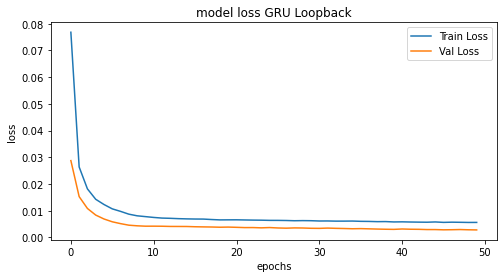

In [432]:
plt.figure(figsize=(8,4))
plt.plot(history_1_gru2.history['loss'], label='Train Loss')
plt.plot(history_1_gru2.history['val_loss'], label='Val Loss')
plt.title('model loss GRU Loopback')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

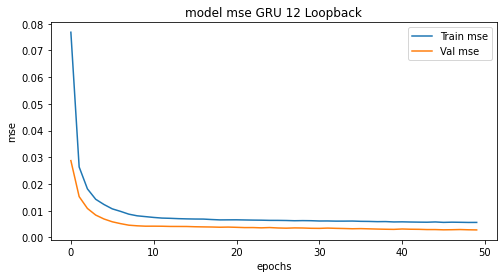

In [433]:
plt.figure(figsize=(8,4))
plt.plot(history_1_gru2.history['mse'], label='Train mse')
plt.plot(history_1_gru2.history['val_mse'], label='Val mse')
plt.title('model mse GRU 12 Loopback')
plt.ylabel('mse')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

In [434]:
train_predict_gru2 = model_uni_rnn1.predict(X_train_lags)
val_predict_gru2 = model_uni_rnn1.predict(X_val_lags)
test_predict_gru2 = model_uni_rnn1.predict(X_test_lags)
# invert predictions
train_predict_gru2 = scaler.inverse_transform(train_predict_gru2)
y_train_lags = scaler.inverse_transform([y_train_lags])
val_predict_gru2 = scaler.inverse_transform(val_predict_gru2)
y_val_lags = scaler.inverse_transform([y_val_lags])
test_predict_gru2 = scaler.inverse_transform(test_predict_gru2)
y_test_lags = scaler.inverse_transform([y_test_lags])

In [435]:
rmse_gru2 = sqrt(mean_squared_error(y_test_lags[0], test_predict_gru2[:,0]))
print('Test RMSE: %.3f' % rmse_gru2)

Test RMSE: 308.019


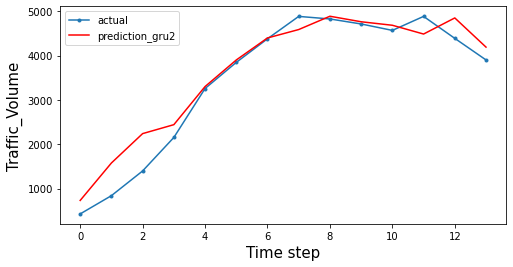

In [436]:
aa=[x for x in range(14)]
plt.figure(figsize=(8,4))
plt.plot(aa, y_test_lags[0][:14], marker='.', label="actual")
plt.plot(aa, test_predict_gru2[:,0][:14], 'r', label="prediction_gru2")
plt.ylabel('Traffic_Volume', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=10)
plt.show();

## Results and Conclusion:

**GRU with 12 hours of lag is the best model for the Univariate Time Series. It has the least RMSE and closest possible predictions to the original values as possible. The Validation loss and MSE is the least for this model. We can say that having GRU with taking more amount of past data produces the best results in terms of MSE and Trend and Magnitude capturing of the predictions having more previous data at hand to make better predictions**

## Performed after submitting the code and the implementation results on Dec 1

## Convolutional Neural Networks(CNN) for Univariate Time Series Forecasting

In [437]:
# Function to create lag of desired periods for CNN 

def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [438]:
# Reshaping the train, validation and test data by creating a dataset with a lag of 12 periods
X_train_cnn, y_train_cnn = split_sequence((abc9[['traffic_volume']][0:26090].values), 12)
X_val_cnn, y_val_cnn = split_sequence((abc9[['traffic_volume']][26090:33544].values), 12)
X_test_cnn, y_test_cnn = split_sequence((abc9[['traffic_volume']][33544:].values), 12)

In [439]:
# Build CNN Model with 2 Conv1D layer and kernel size of 2

model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])))
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dropout(0.2))
model_cnn.add(Dense(1))
model_cnn.compile(loss='mse', optimizer='adam', metrics=['mse'])
model_cnn.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 11, 64)            192       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 10, 64)            8256      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 5, 64)             0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 320)               0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 320)               0         
_________________________________________________________________
dense_53 (Dense)             (None, 1)                 321       
Total params: 8,769
Trainable params: 8,769
Non-trainable params: 0
___________________________________________________

In [440]:
history_1_cnn = model_cnn.fit(X_train_cnn,y_train_cnn,epochs=50, batch_size=100, validation_data=(X_val_cnn, y_val_cnn), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

Epoch 1/50
261/261 [==============================] - 1s 5ms/step - loss: 1801173.3750 - mse: 1801173.3750 - val_loss: 416985.9062 - val_mse: 416985.9062
Epoch 2/50
261/261 [==============================] - 1s 3ms/step - loss: 530565.5625 - mse: 530565.5625 - val_loss: 274356.7188 - val_mse: 274356.7188
Epoch 3/50
261/261 [==============================] - 1s 4ms/step - loss: 468118.0625 - mse: 468118.0625 - val_loss: 230245.0781 - val_mse: 230245.0781
Epoch 4/50
261/261 [==============================] - 1s 4ms/step - loss: 418296.3750 - mse: 418296.3750 - val_loss: 207062.3281 - val_mse: 207062.3281
Epoch 5/50
261/261 [==============================] - 1s 3ms/step - loss: 389738.9688 - mse: 389738.9688 - val_loss: 187310.2188 - val_mse: 187310.2188
Epoch 6/50
261/261 [==============================] - 1s 3ms/step - loss: 376687.2500 - mse: 376687.2500 - val_loss: 177651.9375 - val_mse: 177651.9375
Epoch 7/50
261/261 [==============================] - 1s 4ms/step - loss: 368946.0938 

In [441]:
model_cnn.predict(X_test_cnn).shape

(3715, 1)

In [442]:
y_test_cnn.shape

(3715, 1)

In [443]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_cnn = sqrt(mean_squared_error(y_test_cnn, model_cnn.predict(X_test_cnn)))
print('Test RMSE: %.3f' % rmse_cnn)

Test RMSE: 311.501


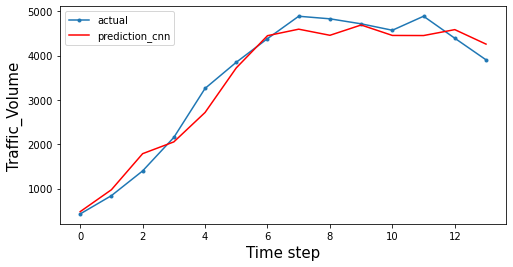

In [445]:
aa=[x for x in range(14)]
plt.figure(figsize=(8,4))
plt.plot(aa, y_test_cnn[:14], marker='.', label="actual")
plt.plot(aa, model_cnn.predict(X_test_cnn)[:14], 'r', label="prediction_cnn")
plt.ylabel('Traffic_Volume', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=10)
plt.show();

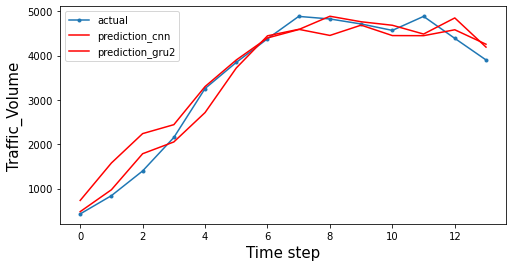

In [446]:
aa=[x for x in range(14)]
plt.figure(figsize=(8,4))
plt.plot(aa, y_test_cnn[:14], marker='.', label="actual")
plt.plot(aa, model_cnn.predict(X_test_cnn)[:14], 'r', label="prediction_cnn")
plt.plot(aa, test_predict_gru2[:,0][:14], 'r', label="prediction_gru2")
plt.ylabel('Traffic_Volume', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=10)
plt.show();

**Results and Conclusion**

**CNN with 2 Conv1D layers, filters of size 64 and kernel size of 2 require a huge amount of computational effort to achieve the same kind of results as GRU or may be worse than RNN in some cases based on multiple runs of the model. Even though the prediction graph is good along with good MSE we can still say it shouls not be used for time series data where the data is tighly coupled with each other as a time series problem.**

In [447]:
X_train_cnn1, y_train_cnn1 = split_sequence((abc9[['traffic_volume']][0:26090].values), 12)
X_val_cnn1, y_val_cnn1 = split_sequence((abc9[['traffic_volume']][26090:33544].values), 12)
X_test_cnn1, y_test_cnn1 = split_sequence((abc9[['traffic_volume']][33544:].values), 12)

In [448]:
# Build CNN Model with 2 Conv1D layer and kernel size of 2

model_cnn1 = Sequential()
model_cnn1.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_cnn1.shape[1], X_train_cnn1.shape[2])))
model_cnn1.add(MaxPooling1D(pool_size=2))
model_cnn1.add(Flatten())
model_cnn1.add(Dropout(0.2))
model_cnn1.add(Dense(1))
model_cnn1.compile(loss='mse', optimizer='adam', metrics=['mse'])
model_cnn1.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 11, 64)            192       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 5, 64)             0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 320)               0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 320)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 321       
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [449]:
history_1_cnn1 = model_cnn.fit(X_train_cnn1,y_train_cnn1,epochs=50, batch_size=100, validation_data=(X_val_cnn1, y_val_cnn1), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

Epoch 1/50
261/261 [==============================] - 1s 5ms/step - loss: 274619.1562 - mse: 274619.1562 - val_loss: 130646.3281 - val_mse: 130646.3281
Epoch 2/50
261/261 [==============================] - 1s 5ms/step - loss: 274138.5312 - mse: 274138.5312 - val_loss: 135705.1406 - val_mse: 135705.1406
Epoch 3/50
261/261 [==============================] - 1s 4ms/step - loss: 280142.0625 - mse: 280142.0312 - val_loss: 129857.7109 - val_mse: 129857.7109
Epoch 4/50
261/261 [==============================] - 1s 3ms/step - loss: 275308.3438 - mse: 275308.3438 - val_loss: 130543.7812 - val_mse: 130543.7812
Epoch 5/50
261/261 [==============================] - 1s 4ms/step - loss: 277411.5938 - mse: 277411.5625 - val_loss: 130920.7656 - val_mse: 130920.7656
Epoch 6/50
261/261 [==============================] - 1s 4ms/step - loss: 274014.5000 - mse: 274014.5000 - val_loss: 130941.3047 - val_mse: 130941.3047
Epoch 7/50
261/261 [==============================] - 1s 4ms/step - loss: 276683.5938 - 

In [450]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_cnn1 = sqrt(mean_squared_error(y_test_cnn1, model_cnn1.predict(X_test_cnn1)))
print('Test RMSE: %.3f' % rmse_cnn1)

Test RMSE: 3841.450


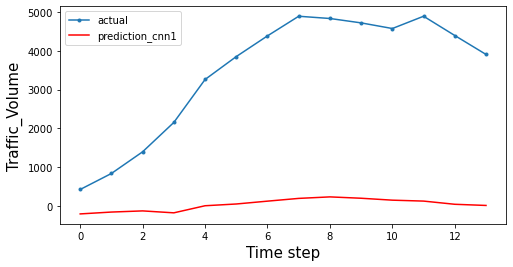

In [451]:
aa=[x for x in range(14)]
plt.figure(figsize=(8,4))
plt.plot(aa, y_test_cnn[:14], marker='.', label="actual")
plt.plot(aa, model_cnn1.predict(X_test_cnn1)[:14], 'r', label="prediction_cnn1")
plt.ylabel('Traffic_Volume', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=10)
plt.show();

**Results and Conclusion**

**We can see that using only single Convolutional Layer produces pathetic results with MSE reaching in thousands instead of being in the range of 300's. The prediction shows that CNN is predicting almost 0 all the time when the actual data is totally different. If we want to achieve a good prediction result, we would need to increase the complexity of the network by adding more number of Convolutional Layers which exponentially increase the compute power required but the accuracy of predicting future traffic volume is worse than GRU which requires 40 times less computational effort to achieve the same results.**

## References:

https://www.kaggle.com/amirrezaeian/time-series-data-analysis-using-lstm-tutorial <br>
https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/ <br>
https://towardsdatascience.com/time-series-analysis-visualization-forecasting-with-lstm-77a905180eba <br>
https://keras.io/examples/timeseries/timeseries_weather_forecasting/ <br>
https://www.kaggle.com/willkoehrsen/neural-network-embedding-recommendation-system <br>
https://towardsdatascience.com/time-series-forecasting-with-lstms-using-tensorflow-2-and-keras-in-python-6ceee9c6c651 <br>
https://towardsdatascience.com/energy-consumption-time-series-forecasting-with-python-and-lstm-deep-learning-model-7952e2f9a796 <br>
https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/ <br>
https://machinelearningmastery.com/how-to-develop-convolutional-neural-network-models-for-time-series-forecasting/ <br>
https://www.kaggle.com/dimitreoliveira/deep-learning-for-time-series-forecasting <br>